In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import zarr
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import gym_pusht


def make_env(differential_action=False, render_mode='rgb_array'):
    # Adjust the env_id if you are using a specific repo 
    # (e.g., 'gym_pusht/PushT-v0' or a local import like PushTImageEnv)
    ENV_ID = "gym_pusht/PushT-v0"

    try:
        # We use render_mode='human' to see the replay live, 
        # or 'rgb_array' if you want to save frames.
        env = gym.make(ENV_ID, render_mode=render_mode, differential_action=differential_action, observation_width=64, observation_height=64)
        # env = gym.make(ENV_ID, render_mode="rgb_array")
        
        print(f"Successfully created environment: {ENV_ID}")
        
        # Reset to check if it works
        obs, info = env.reset()
        
    except Exception as e:
        print(f"Error creating environment: {e}")
        print("Ensure gym-pusht is installed or adjust the ENV_ID.")
        # print out the environments that gym is aware of
        print("Available environments:", gym.envs.registry.keys())
        env=None
    return env


In [55]:
# import time
# env = make_env(differential_action=True)
# for _ in range(10):
#     env.step(np.array([100, 100.0]))
#     env.render()
#     time.sleep(0.1)

In [56]:
def inspect_zarr_file(zarr_path):
    """
    Opens the Zarr file and prints the tree structure 
    to help identify the keys for states, actions, and images.
    """
    try:
        root = zarr.open(zarr_path, mode='r')
        print(f"Opened Zarr file at: {zarr_path}")
        print("-" * 20)
        print(root.tree())
        return root
    except Exception as e:
        print(f"Failed to load Zarr file. Download from https://diffusion-policy.cs.columbia.edu/data/training/ : {e}.")
        return None

# Replace with your actual path
ZARR_PATH = "/home/james/workspace/gym-pusht/demonstrations/pusht/pusht_cchi_v7_replay.zarr"
root = inspect_zarr_file(ZARR_PATH)

Opened Zarr file at: /home/james/workspace/gym-pusht/demonstrations/pusht/pusht_cchi_v7_replay.zarr
--------------------
/
 ├── data
 │   ├── action (25650, 2) float32
 │   ├── img (25650, 96, 96, 3) float32
 │   ├── keypoint (25650, 9, 2) float32
 │   ├── n_contacts (25650, 1) float32
 │   └── state (25650, 5) float32
 └── meta
     └── episode_ends (206,) int64


In [57]:
def find_offset(zarr_path, ep_idx):
    root = zarr.open(zarr_path, mode='r')
    
    # Grab the first frame
    state_0 = root['data/state'][ep_idx]    # [agent_x, agent_y, block_x, block_y, angle]
    kps_0 = root['data/keypoint'][ep_idx]   # [k1, k2, ..., k9]
    
    # Physics position of the block from state
    physics_pos = state_0[2:4]
    
    # Visual center is usually roughly the mean of all keypoints
    # OR sometimes specifically keypoint index 3 or 4 depending on the specific PushT version
    visual_pos = np.mean(kps_0, axis=0) 
    
    offset = physics_pos - visual_pos
    
    print(f"Physics Position: {physics_pos}")
    print(f"Visual Centroid:  {visual_pos}")
    print(f"Calculated Offset: {offset}")
    return offset

offset = find_offset(ZARR_PATH, 0)

Physics Position: [222.99382 381.59903]
Visual Centroid:  [217.55998 341.68152]
Calculated Offset: [ 5.433838 39.91751 ]


Loaded 206 episodes.
Pusht force sparse reward:  False  display_cross:  False
Successfully created environment: gym_pusht/PushT-v0
Pusht force sparse reward:  False  display_cross:  False
Successfully created environment: gym_pusht/PushT-v0
diff position +89.80


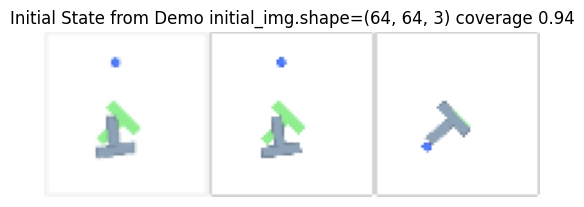

Episode replay complete. info['coverage']=0.9390295795726025 vs pixel coverage 0.93
diff position +14.01


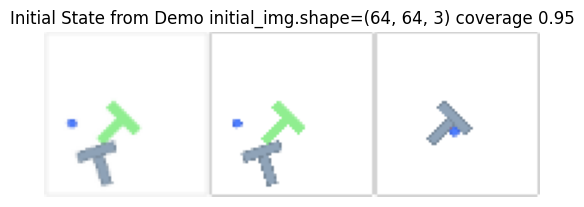

Episode replay complete. info['coverage']=0.9474702915275567 vs pixel coverage 1.00
diff position +89.77


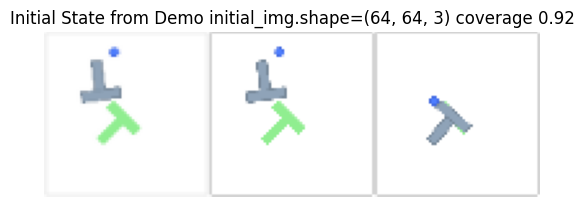

Episode replay complete. info['coverage']=0.9187758937493837 vs pixel coverage 0.95
diff position +85.90


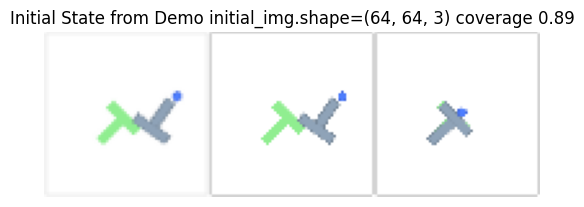

Episode replay complete. info['coverage']=0.8930314038377671 vs pixel coverage 0.93
diff position +6.12


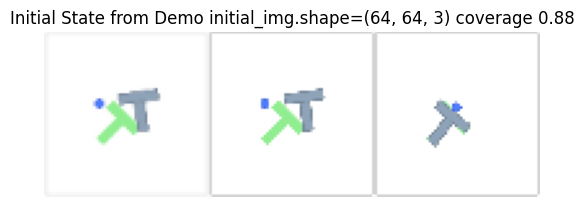

Episode replay complete. info['coverage']=0.8763737022239139 vs pixel coverage 0.93
diff position +89.76


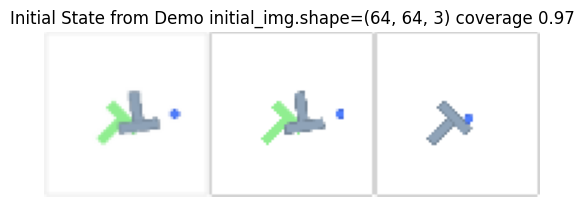

Episode replay complete. info['coverage']=0.9652587846040461 vs pixel coverage 1.00
diff position +76.58


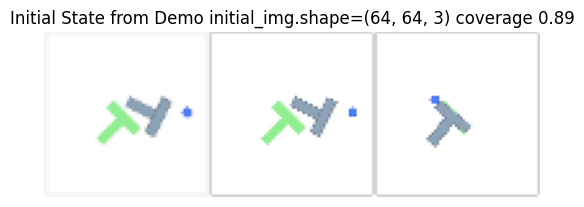

Episode replay complete. info['coverage']=0.8851864839332364 vs pixel coverage 0.93
diff position +89.39


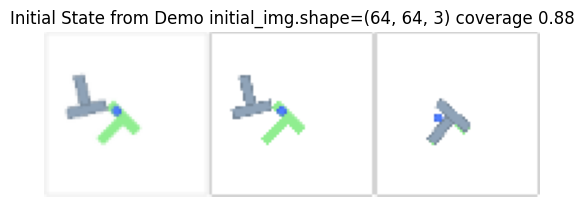

Episode replay complete. info['coverage']=0.8775257960755575 vs pixel coverage 0.95
diff position +50.15


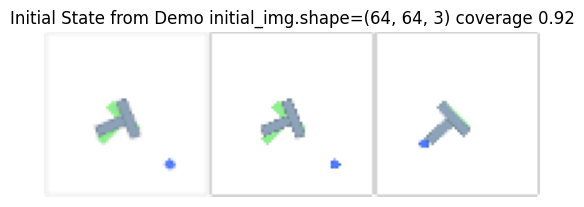

Episode replay complete. info['coverage']=0.920675348262097 vs pixel coverage 0.91
diff position +26.02


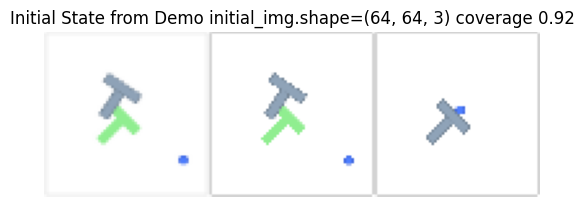

Episode replay complete. info['coverage']=0.9209960799616732 vs pixel coverage 1.00
diff position +52.93


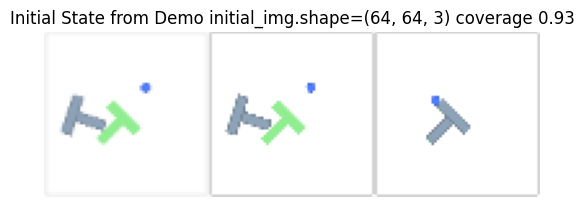

Episode replay complete. info['coverage']=0.9286770657917031 vs pixel coverage 1.00
diff position +49.43


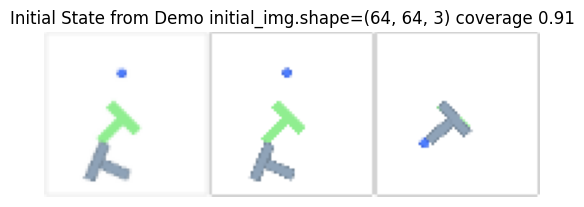

Episode replay complete. info['coverage']=0.9065519737765291 vs pixel coverage 0.95
diff position +66.37


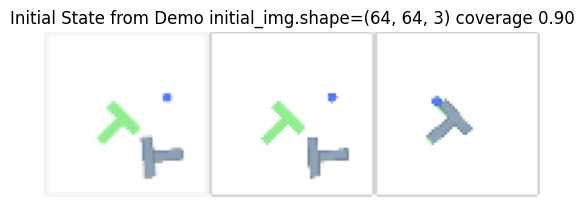

Episode replay complete. info['coverage']=0.8951545254099461 vs pixel coverage 0.94
diff position +89.12


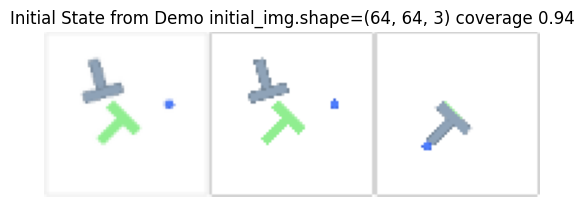

Episode replay complete. info['coverage']=0.9447478745767567 vs pixel coverage 0.93
diff position +89.87


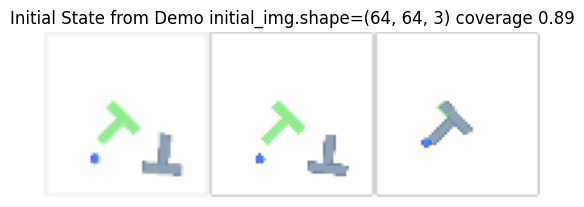

Episode replay complete. info['coverage']=0.8921064400970756 vs pixel coverage 0.94
diff position +85.78


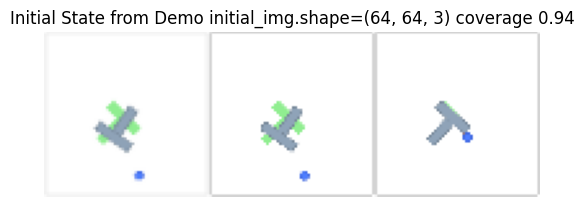

Episode replay complete. info['coverage']=0.9441599151776079 vs pixel coverage 0.95
diff position +26.32


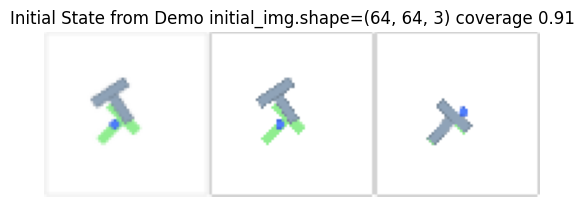

Episode replay complete. info['coverage']=0.9114073417439519 vs pixel coverage 0.94
diff position +34.28


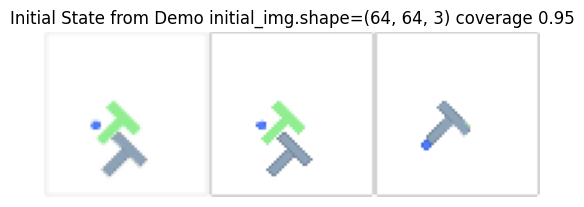

Episode replay complete. info['coverage']=0.9479344176815325 vs pixel coverage 0.98
diff position +46.42


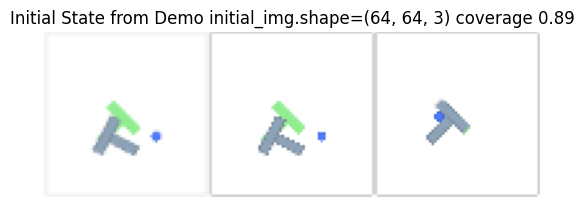

Episode replay complete. info['coverage']=0.8854114834105025 vs pixel coverage 0.97
diff position +27.62


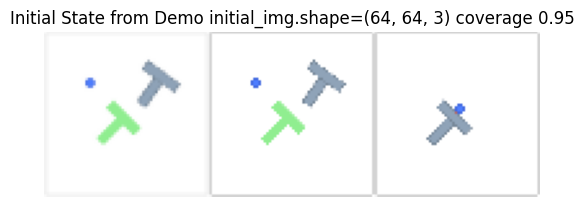

Episode replay complete. info['coverage']=0.9534704054186608 vs pixel coverage 1.00
diff position +88.91


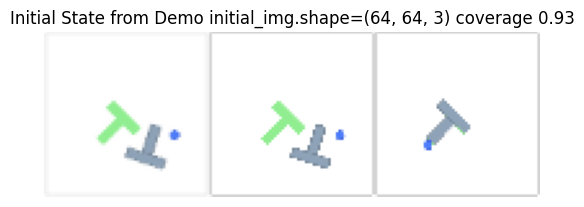

Episode replay complete. info['coverage']=0.9272309551450455 vs pixel coverage 0.96
diff position +78.41


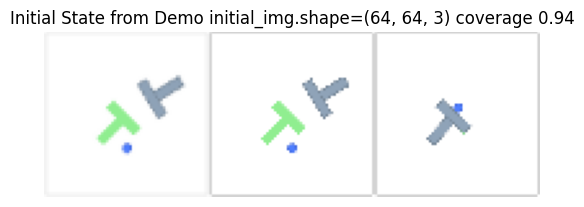

Episode replay complete. info['coverage']=0.9407385601431004 vs pixel coverage 0.99
diff position +89.58


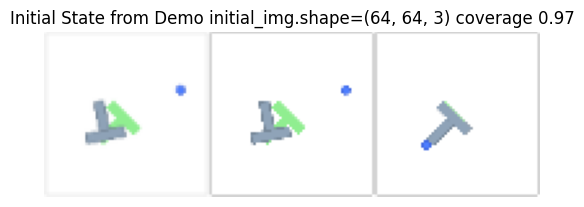

Episode replay complete. info['coverage']=0.9674521567306806 vs pixel coverage 0.92
diff position +27.19


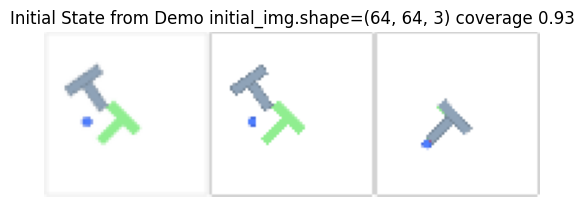

Episode replay complete. info['coverage']=0.9270110397420449 vs pixel coverage 0.97
diff position +89.98


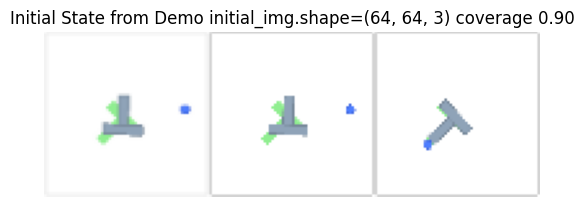

Episode replay complete. info['coverage']=0.9041700037161009 vs pixel coverage 0.95
diff position +41.76


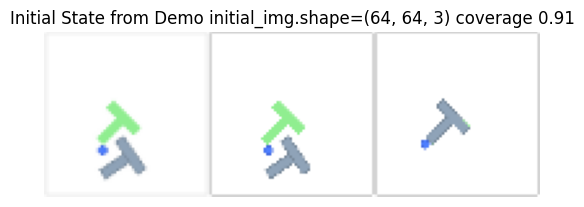

Episode replay complete. info['coverage']=0.9102221603548599 vs pixel coverage 0.97
diff position +30.03


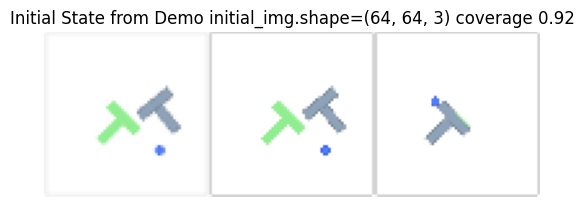

Episode replay complete. info['coverage']=0.9173016668135507 vs pixel coverage 0.94
diff position +51.22


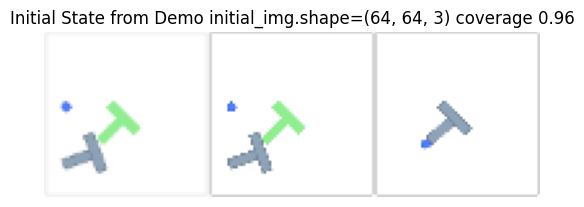

Episode replay complete. info['coverage']=0.9637596446905891 vs pixel coverage 1.00
diff position +41.87


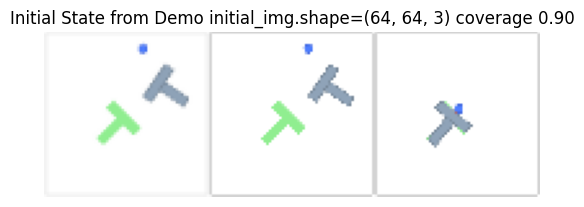

Episode replay complete. info['coverage']=0.8959841481525618 vs pixel coverage 0.93
diff position +57.44


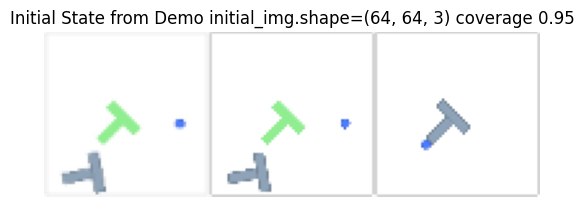

Episode replay complete. info['coverage']=0.9501773732273183 vs pixel coverage 1.00
diff position +8.22


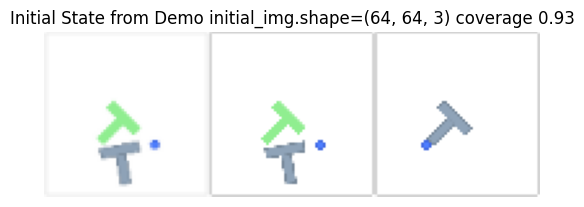

Episode replay complete. info['coverage']=0.9259587098958362 vs pixel coverage 1.00
diff position +25.44


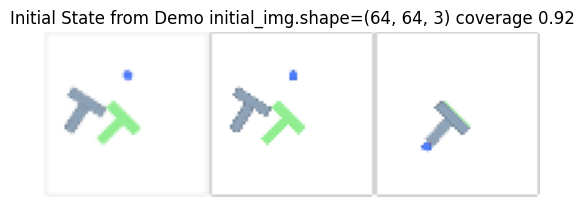

Episode replay complete. info['coverage']=0.9167226738841594 vs pixel coverage 0.90
diff position +77.20


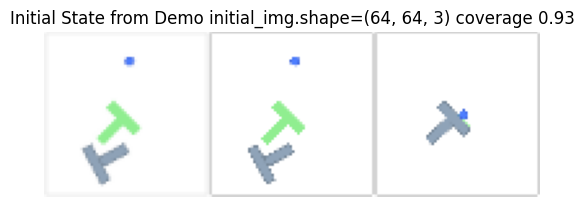

Episode replay complete. info['coverage']=0.9330279654715871 vs pixel coverage 0.97
diff position +9.94


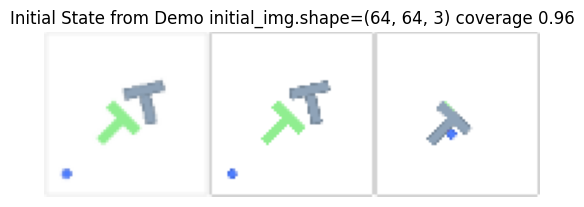

Episode replay complete. info['coverage']=0.9569949649695134 vs pixel coverage 0.96
diff position +84.06


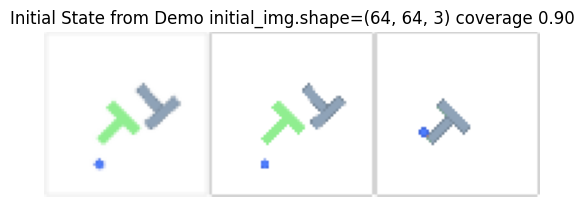

Episode replay complete. info['coverage']=0.8990164380619351 vs pixel coverage 1.00
diff position +78.23


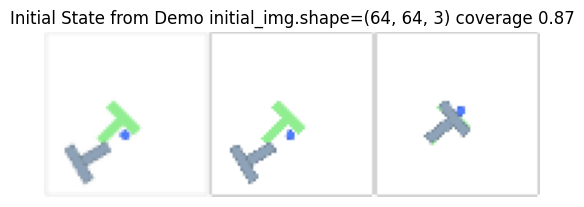

Episode replay complete. info['coverage']=0.8710044267095377 vs pixel coverage 0.92
diff position +48.38


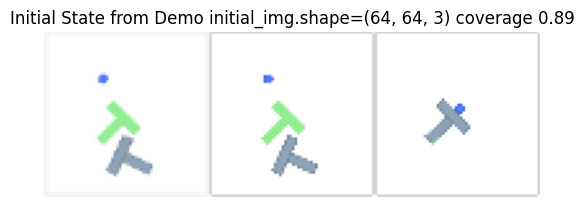

Episode replay complete. info['coverage']=0.8858692351094917 vs pixel coverage 0.97
diff position +74.09


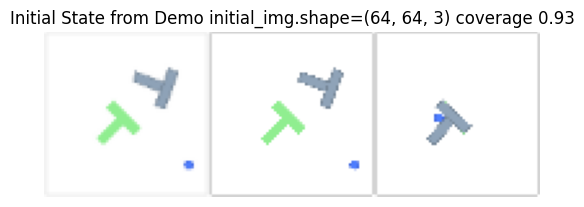

Episode replay complete. info['coverage']=0.9324223297368304 vs pixel coverage 0.98
diff position +55.44


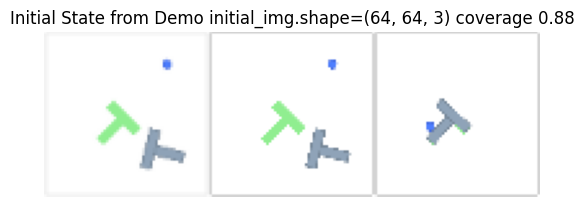

Episode replay complete. info['coverage']=0.8836182035632205 vs pixel coverage 0.95
diff position +80.78


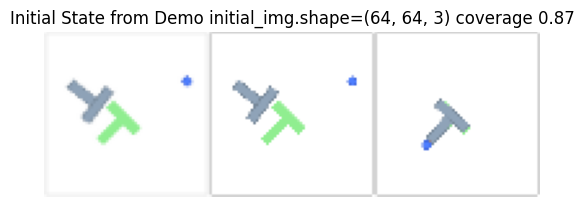

Episode replay complete. info['coverage']=0.8723560863046126 vs pixel coverage 0.94
diff position +49.32


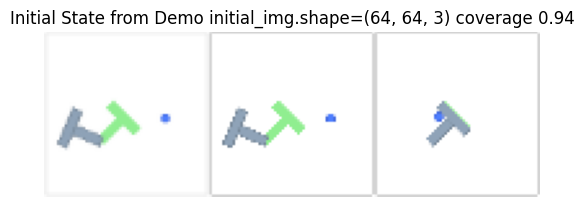

Episode replay complete. info['coverage']=0.942059707701505 vs pixel coverage 0.90
diff position +63.53


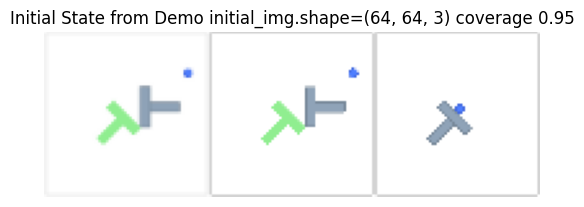

Episode replay complete. info['coverage']=0.9485050447833625 vs pixel coverage 1.00
diff position +7.38


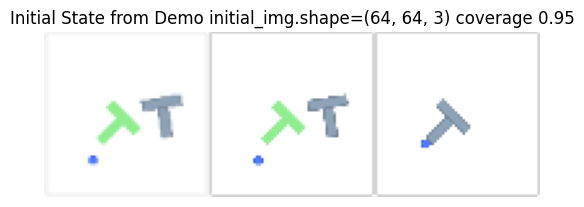

Episode replay complete. info['coverage']=0.9469921132707474 vs pixel coverage 1.00
diff position +59.01


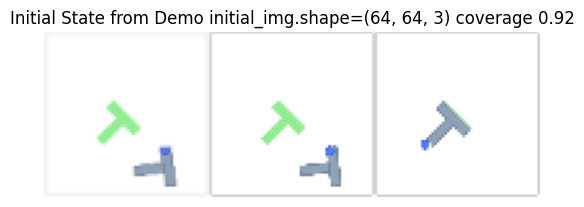

Episode replay complete. info['coverage']=0.9221869216586649 vs pixel coverage 0.90
diff position +80.32


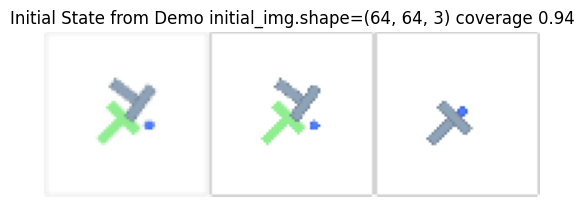

Episode replay complete. info['coverage']=0.9420862187056241 vs pixel coverage 1.00
diff position +85.24


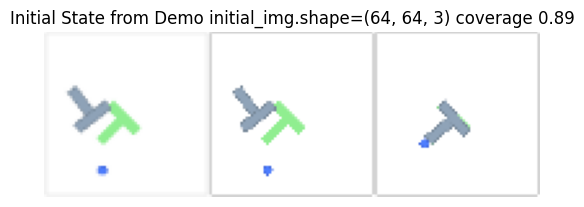

Episode replay complete. info['coverage']=0.8906492327410361 vs pixel coverage 0.94
diff position +10.63


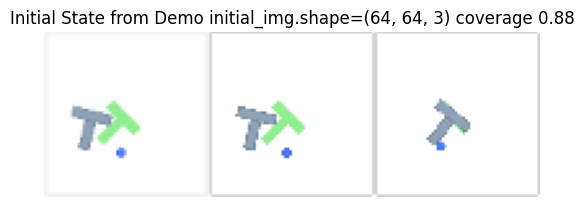

Episode replay complete. info['coverage']=0.8817040406147538 vs pixel coverage 0.94
diff position +15.98


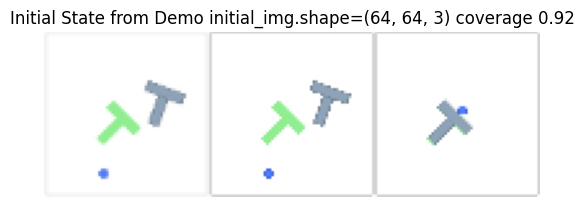

Episode replay complete. info['coverage']=0.9183715368256322 vs pixel coverage 0.93
diff position +79.22


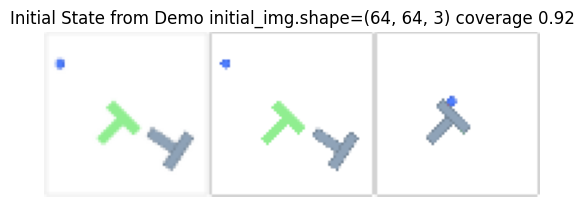

Episode replay complete. info['coverage']=0.9237915261341078 vs pixel coverage 1.00
diff position +26.68


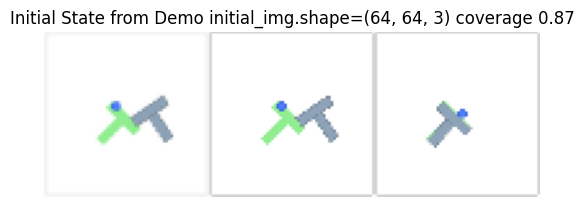

Episode replay complete. info['coverage']=0.86956720492583 vs pixel coverage 0.89
diff position +61.14


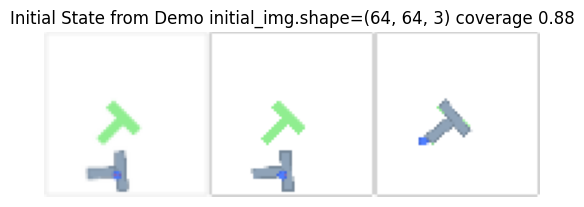

Episode replay complete. info['coverage']=0.8846246436575016 vs pixel coverage 0.93
diff position +17.79


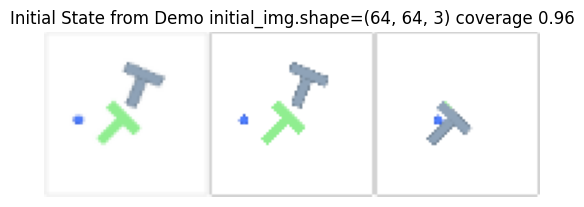

Episode replay complete. info['coverage']=0.9587744944634407 vs pixel coverage 0.97
diff position +69.42


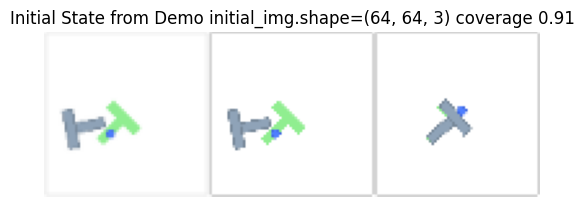

Episode replay complete. info['coverage']=0.9055595854831143 vs pixel coverage 0.95
diff position +89.27


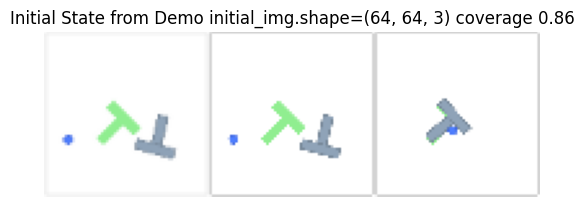

Episode replay complete. info['coverage']=0.8589603270553843 vs pixel coverage 0.92
diff position +52.13


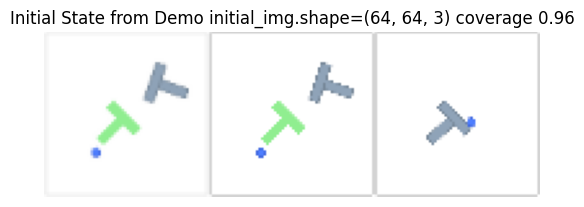

Episode replay complete. info['coverage']=0.9607290736494045 vs pixel coverage 1.00
diff position +55.70


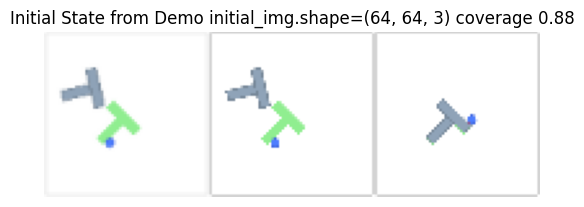

Episode replay complete. info['coverage']=0.8778771978646538 vs pixel coverage 0.95
diff position +12.31


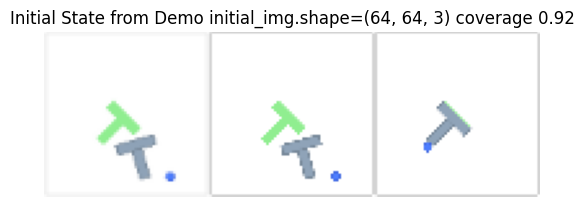

Episode replay complete. info['coverage']=0.9178547986817966 vs pixel coverage 0.90
diff position +35.61


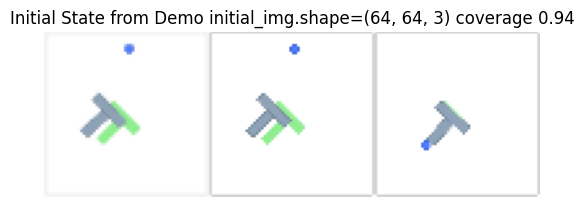

Episode replay complete. info['coverage']=0.9438110349767396 vs pixel coverage 0.93
diff position +74.40


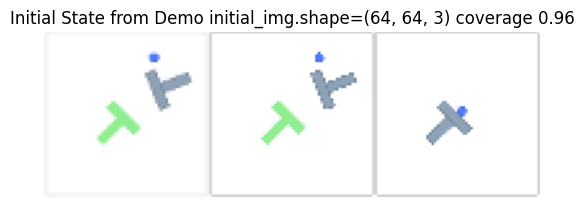

Episode replay complete. info['coverage']=0.9580396089278649 vs pixel coverage 1.00
diff position +81.05


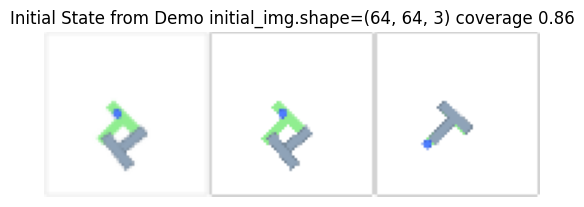

Episode replay complete. info['coverage']=0.8642203149458669 vs pixel coverage 0.94
diff position +65.58


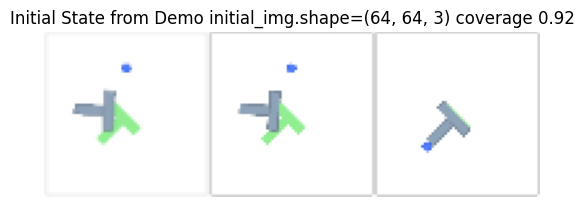

Episode replay complete. info['coverage']=0.9151157654179255 vs pixel coverage 0.91
diff position +32.20


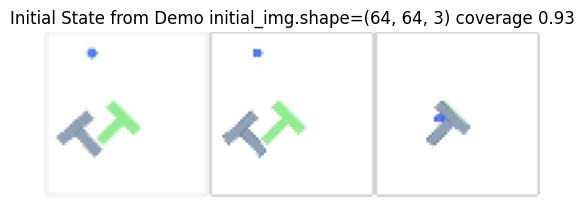

Episode replay complete. info['coverage']=0.9287617017294941 vs pixel coverage 0.91
diff position +71.47


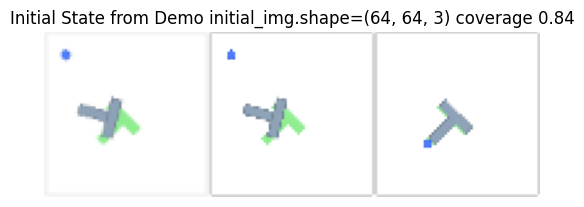

Episode replay complete. info['coverage']=0.8445847188151041 vs pixel coverage 0.90
diff position +89.43


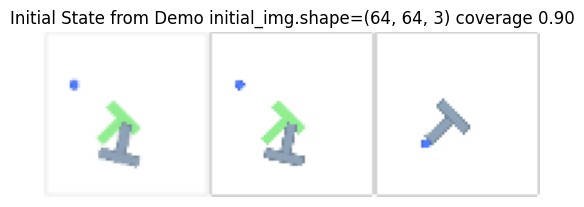

Episode replay complete. info['coverage']=0.9027736035745014 vs pixel coverage 1.00
diff position +89.96


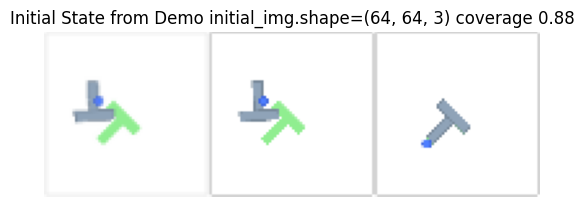

Episode replay complete. info['coverage']=0.8844122790274145 vs pixel coverage 0.99
diff position +77.99


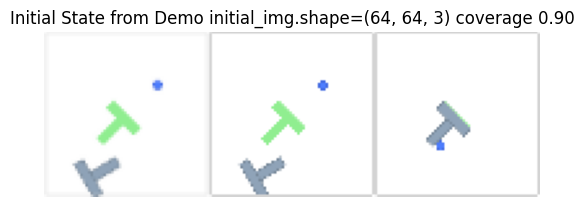

Episode replay complete. info['coverage']=0.8967101139436008 vs pixel coverage 0.90
diff position +23.58


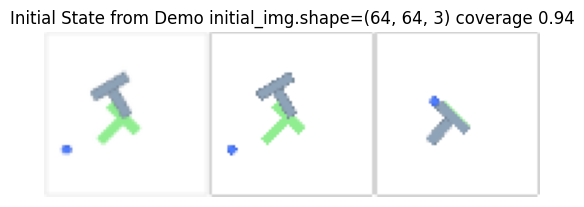

Episode replay complete. info['coverage']=0.9418769427188186 vs pixel coverage 0.90
diff position +87.40


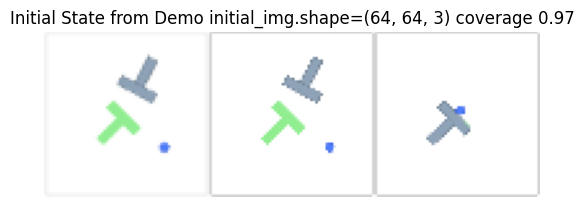

Episode replay complete. info['coverage']=0.9652109257956223 vs pixel coverage 0.98
diff position +56.38


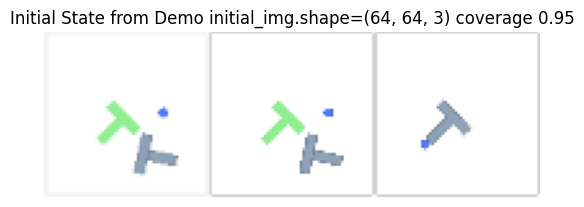

Episode replay complete. info['coverage']=0.949465593706471 vs pixel coverage 0.99
diff position +79.23


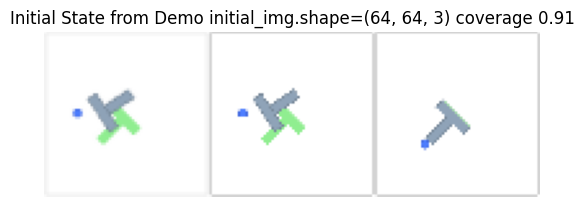

Episode replay complete. info['coverage']=0.9135790087657085 vs pixel coverage 0.90
diff position +80.32


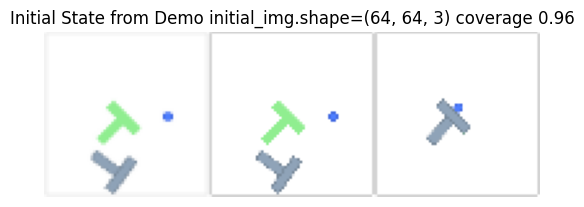

Episode replay complete. info['coverage']=0.9550628670675969 vs pixel coverage 1.00
diff position +76.66


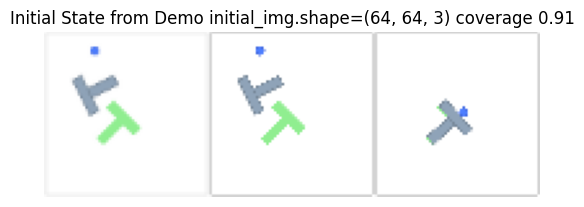

Episode replay complete. info['coverage']=0.908140542805806 vs pixel coverage 0.94
diff position +73.69


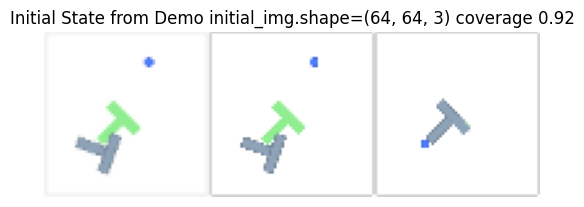

Episode replay complete. info['coverage']=0.9239683801836673 vs pixel coverage 0.98
diff position +14.67


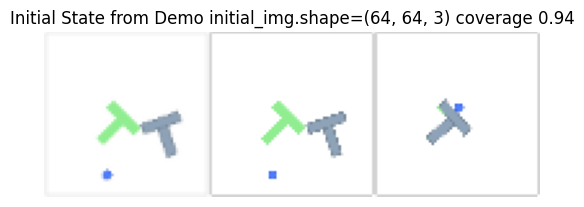

Episode replay complete. info['coverage']=0.9378913556899754 vs pixel coverage 0.97
diff position +79.07


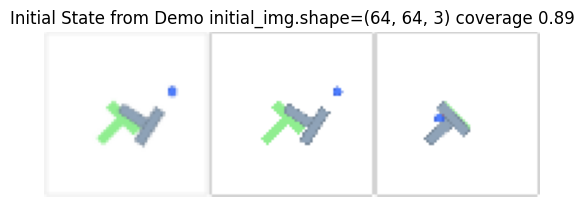

Episode replay complete. info['coverage']=0.8854760032659194 vs pixel coverage 0.90
diff position +81.69


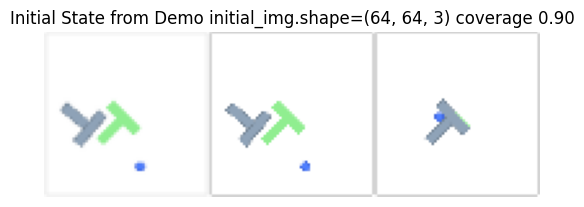

Episode replay complete. info['coverage']=0.9042076431012709 vs pixel coverage 0.94
diff position +80.57


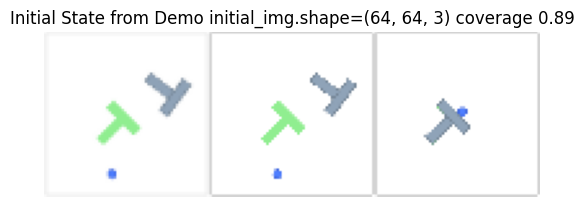

Episode replay complete. info['coverage']=0.8942825825504225 vs pixel coverage 0.99
diff position +67.93


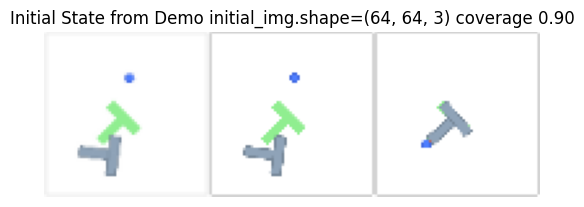

Episode replay complete. info['coverage']=0.9045055318692506 vs pixel coverage 0.94
diff position +81.99


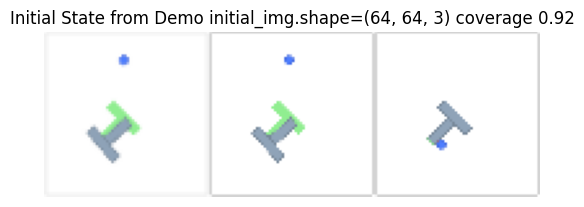

Episode replay complete. info['coverage']=0.9181927243832094 vs pixel coverage 0.98
diff position +58.74


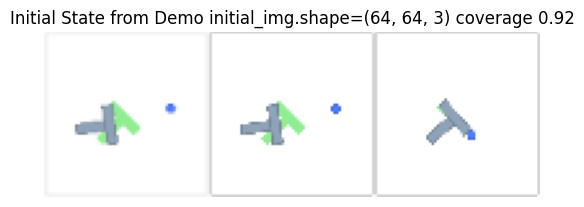

Episode replay complete. info['coverage']=0.9224071063099875 vs pixel coverage 0.97
diff position +28.36


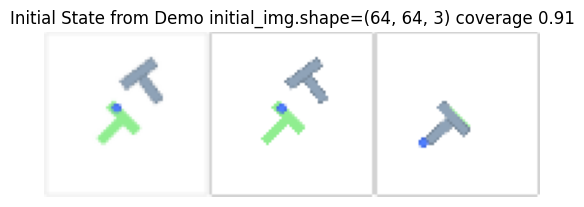

Episode replay complete. info['coverage']=0.9060213839629221 vs pixel coverage 0.92
diff position +89.96


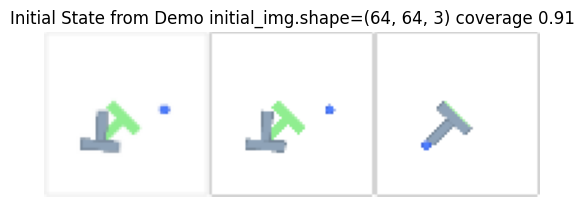

Episode replay complete. info['coverage']=0.9147109312679509 vs pixel coverage 0.90
diff position +13.28


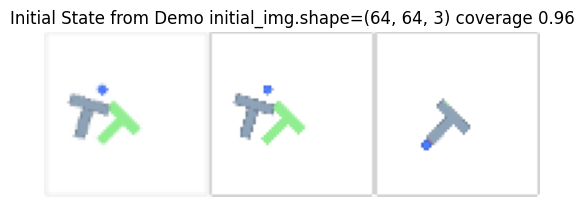

Episode replay complete. info['coverage']=0.9633720797825626 vs pixel coverage 0.98
diff position +61.66


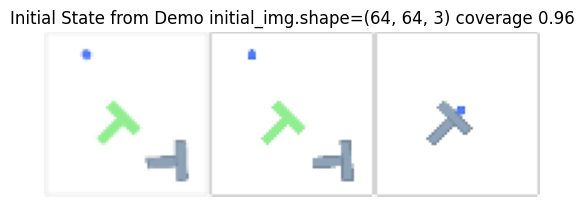

Episode replay complete. info['coverage']=0.9583991964311015 vs pixel coverage 0.99
diff position +12.02


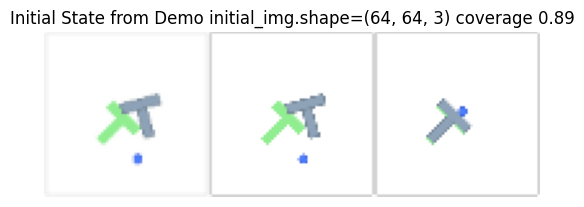

Episode replay complete. info['coverage']=0.8874465147262126 vs pixel coverage 0.89
diff position +20.31


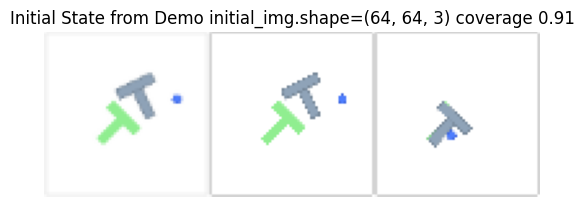

Episode replay complete. info['coverage']=0.9113781428715662 vs pixel coverage 0.96
diff position +45.41


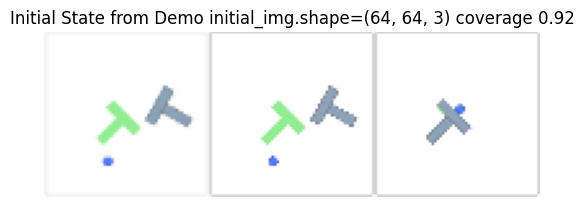

Episode replay complete. info['coverage']=0.919318962905711 vs pixel coverage 0.97
diff position +5.38


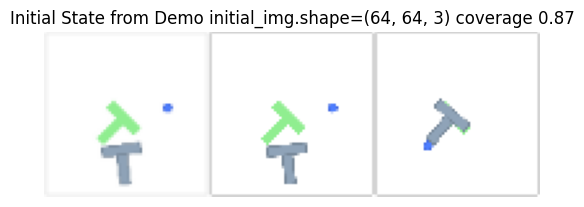

Episode replay complete. info['coverage']=0.8686100102843907 vs pixel coverage 0.93
diff position +87.92


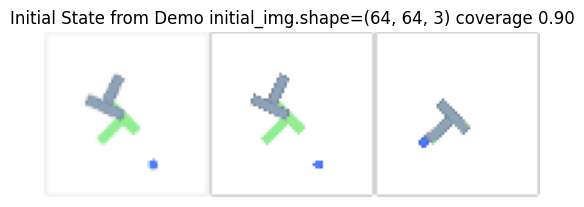

Episode replay complete. info['coverage']=0.8975426184716652 vs pixel coverage 0.96
diff position +81.23


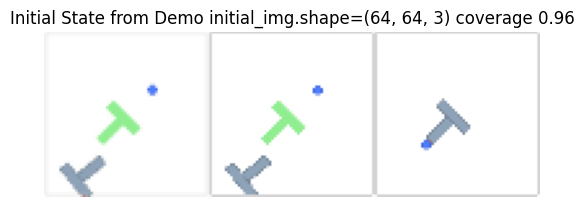

Episode replay complete. info['coverage']=0.9572753062280255 vs pixel coverage 1.00
diff position +25.49


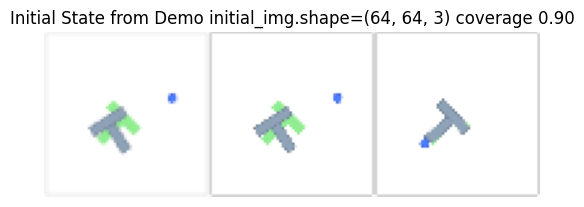

Episode replay complete. info['coverage']=0.8950337091502973 vs pixel coverage 0.96
diff position +58.98


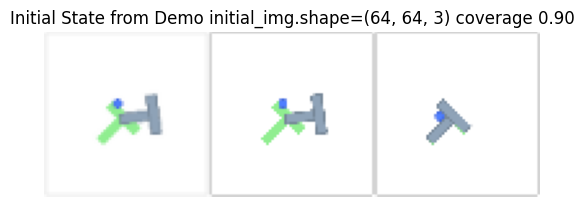

Episode replay complete. info['coverage']=0.9002493479329572 vs pixel coverage 0.96
diff position +30.90


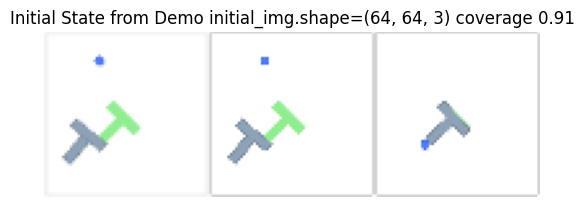

Episode replay complete. info['coverage']=0.9128362287752294 vs pixel coverage 0.93
diff position +51.26


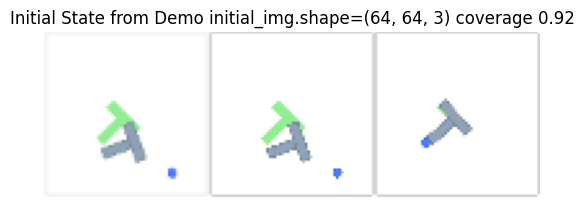

Episode replay complete. info['coverage']=0.9169403710753978 vs pixel coverage 0.96
diff position +24.62


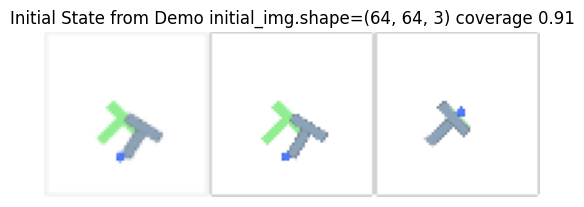

Episode replay complete. info['coverage']=0.9056058983797322 vs pixel coverage 0.95
diff position +59.74


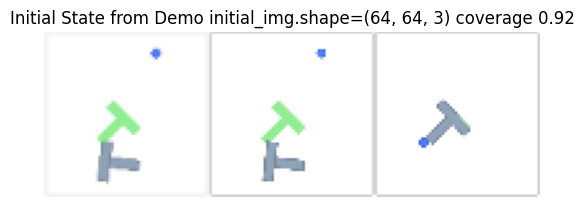

Episode replay complete. info['coverage']=0.9202114684574904 vs pixel coverage 0.96
diff position +56.50


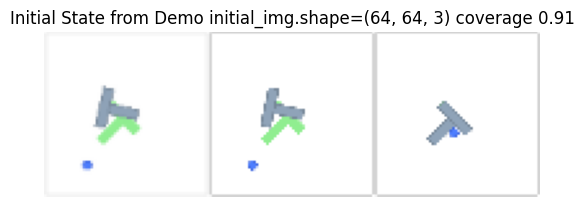

Episode replay complete. info['coverage']=0.9115474394801465 vs pixel coverage 1.00
diff position +88.84


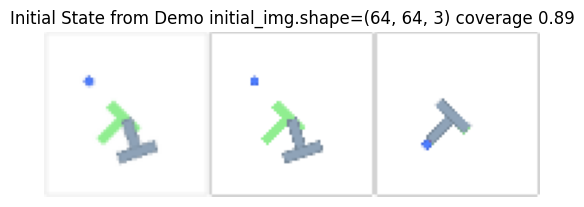

Episode replay complete. info['coverage']=0.8897806244270203 vs pixel coverage 0.98
diff position +5.09


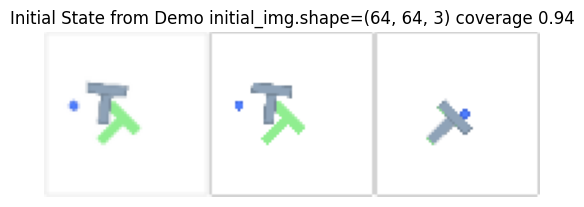

Episode replay complete. info['coverage']=0.942382412863358 vs pixel coverage 0.95
diff position +56.65


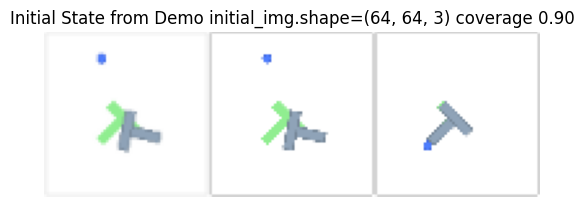

Episode replay complete. info['coverage']=0.895242494644121 vs pixel coverage 0.97
diff position +89.85


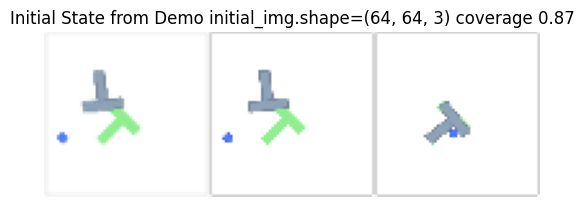

Episode replay complete. info['coverage']=0.8705087941672267 vs pixel coverage 0.92
diff position +6.16


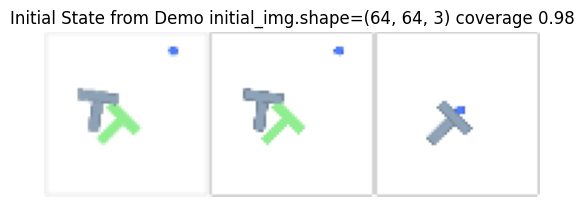

Episode replay complete. info['coverage']=0.9804618771776676 vs pixel coverage 1.00
diff position +88.51


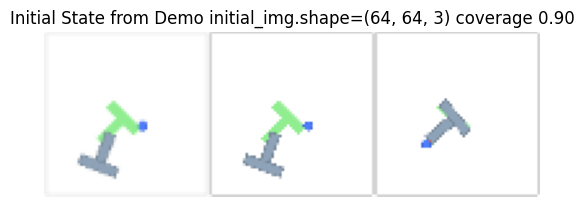

Episode replay complete. info['coverage']=0.8975582719999129 vs pixel coverage 0.94
diff position +48.10


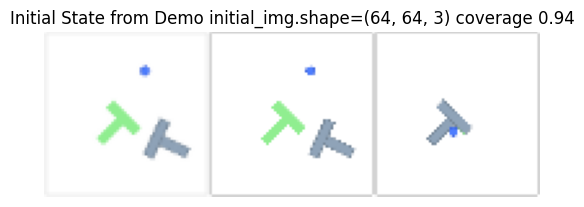

Episode replay complete. info['coverage']=0.9376425460035285 vs pixel coverage 0.99
diff position +29.93


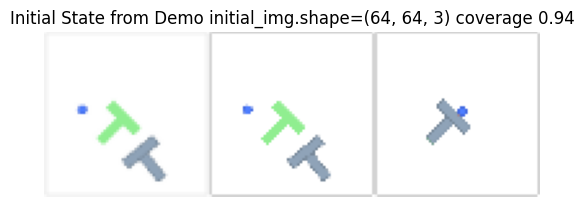

Episode replay complete. info['coverage']=0.9351151646593481 vs pixel coverage 1.00
diff position +58.83


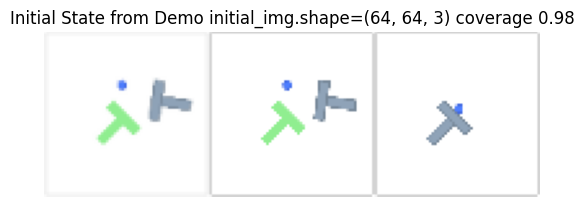

Episode replay complete. info['coverage']=0.9776672067750999 vs pixel coverage 1.00
diff position +82.07


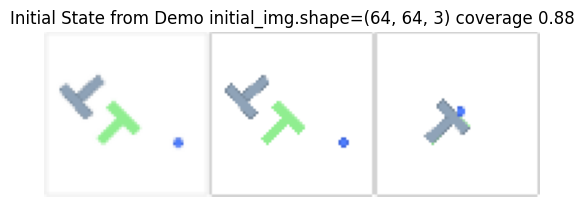

Episode replay complete. info['coverage']=0.8830413441828714 vs pixel coverage 0.95
diff position +88.59


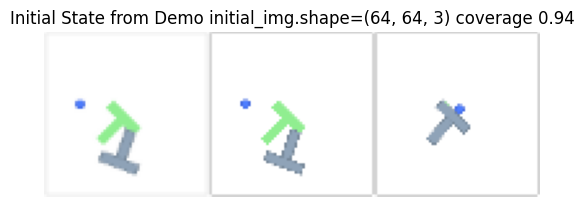

Episode replay complete. info['coverage']=0.9425516545514806 vs pixel coverage 0.98
diff position +28.23


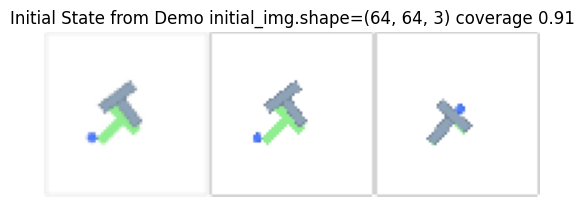

Episode replay complete. info['coverage']=0.9081454044093196 vs pixel coverage 0.95
diff position +88.45


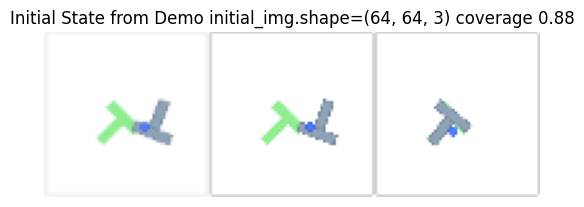

Episode replay complete. info['coverage']=0.877677398004612 vs pixel coverage 0.92
diff position +26.97


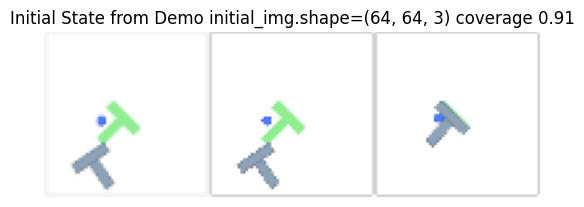

Episode replay complete. info['coverage']=0.9091695479542092 vs pixel coverage 0.90
diff position +14.49


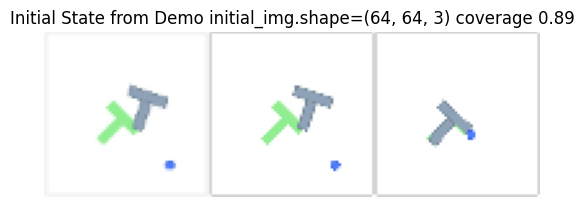

Episode replay complete. info['coverage']=0.8915740221549994 vs pixel coverage 0.94
diff position +23.34


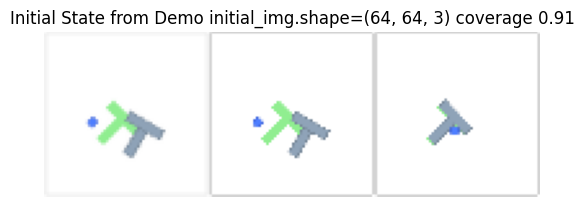

Episode replay complete. info['coverage']=0.9104038860177096 vs pixel coverage 0.92
diff position +80.19


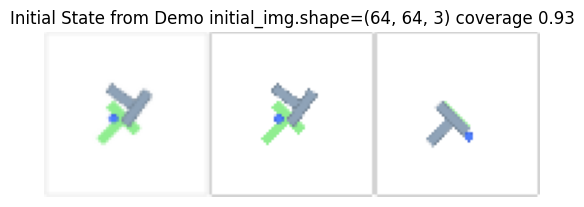

Episode replay complete. info['coverage']=0.9282322154235421 vs pixel coverage 0.90
diff position +89.79


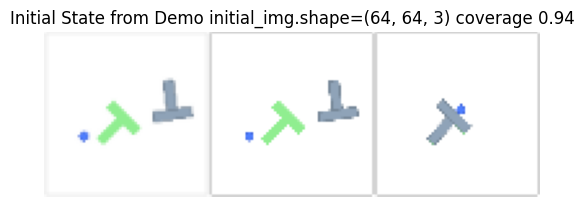

Episode replay complete. info['coverage']=0.9410654559641427 vs pixel coverage 0.99
diff position +90.00


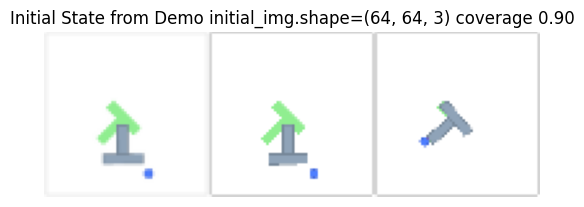

Episode replay complete. info['coverage']=0.8957607508596909 vs pixel coverage 0.95
diff position +67.81


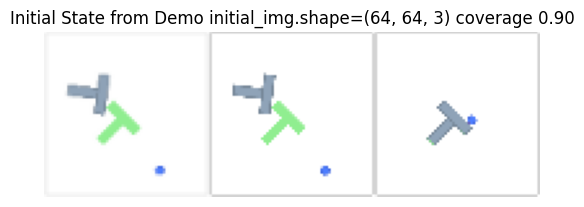

Episode replay complete. info['coverage']=0.9033295241447993 vs pixel coverage 0.98
diff position +85.45


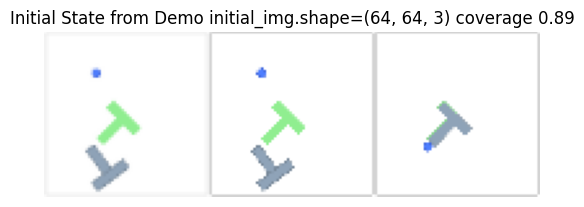

Episode replay complete. info['coverage']=0.8899640109382415 vs pixel coverage 0.84
diff position +63.94


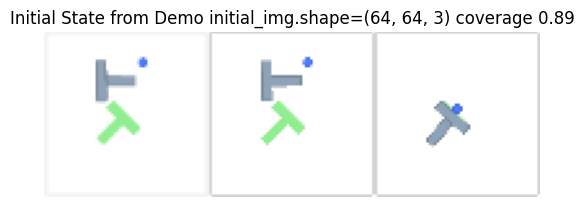

Episode replay complete. info['coverage']=0.8942572787514792 vs pixel coverage 0.94
diff position +11.10


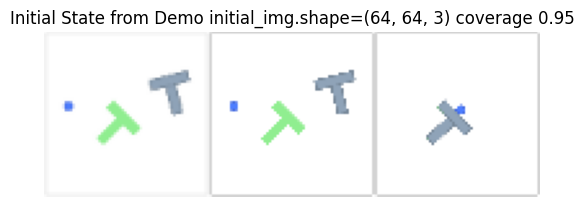

Episode replay complete. info['coverage']=0.9513461942466859 vs pixel coverage 1.00
diff position +20.49


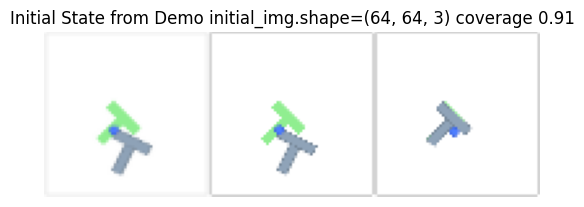

Episode replay complete. info['coverage']=0.907546094766531 vs pixel coverage 0.92
diff position +57.40


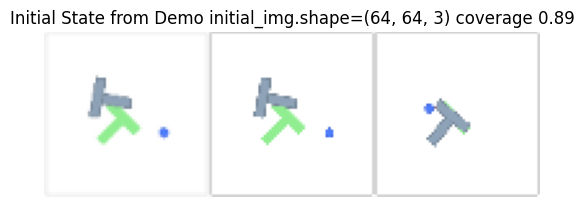

Episode replay complete. info['coverage']=0.8885814229223572 vs pixel coverage 0.93
diff position +52.12


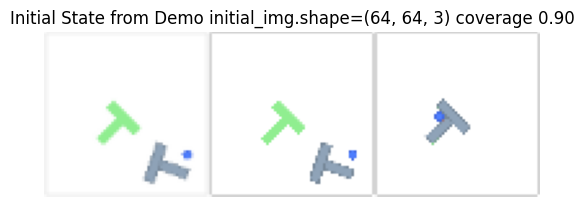

Episode replay complete. info['coverage']=0.9047329725200447 vs pixel coverage 0.99
diff position +87.61


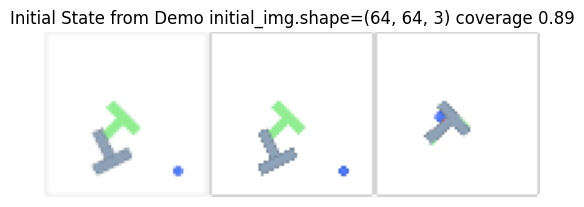

Episode replay complete. info['coverage']=0.8890439430323728 vs pixel coverage 0.94
diff position +67.63


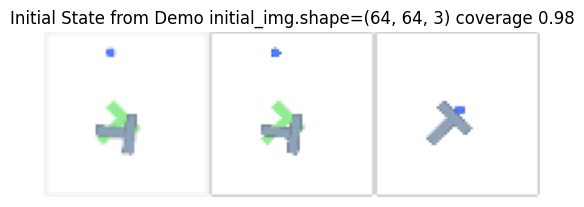

Episode replay complete. info['coverage']=0.9832907908872915 vs pixel coverage 1.00
diff position +88.22


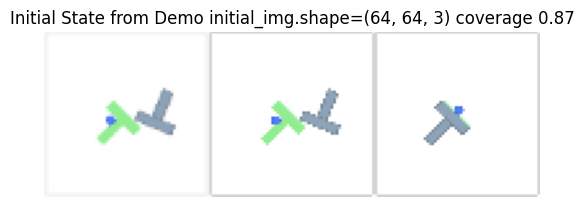

Episode replay complete. info['coverage']=0.8746998894014328 vs pixel coverage 0.92
diff position +43.93


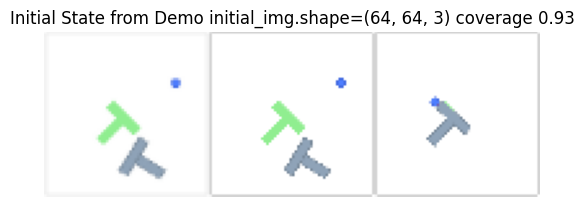

Episode replay complete. info['coverage']=0.932910278225468 vs pixel coverage 0.96
diff position +89.61


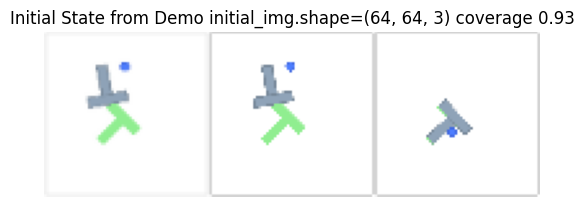

Episode replay complete. info['coverage']=0.9258967895628368 vs pixel coverage 0.94
diff position +76.90


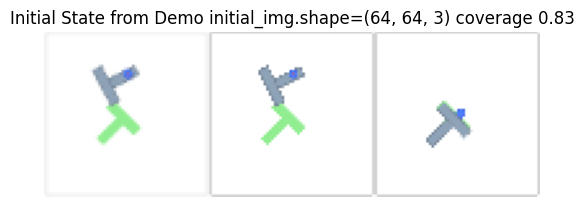

Episode replay complete. info['coverage']=0.830881215887111 vs pixel coverage 0.90
diff position +66.14


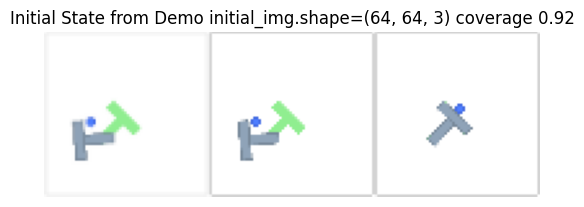

Episode replay complete. info['coverage']=0.9201716633667861 vs pixel coverage 0.99
diff position +53.70


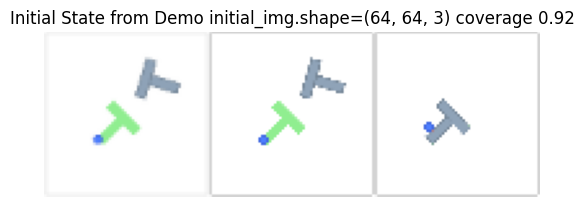

Episode replay complete. info['coverage']=0.9155553925233345 vs pixel coverage 1.00
diff position +64.36


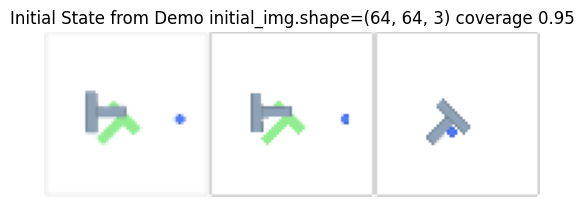

Episode replay complete. info['coverage']=0.94579438457 vs pixel coverage 1.00
diff position +1.60


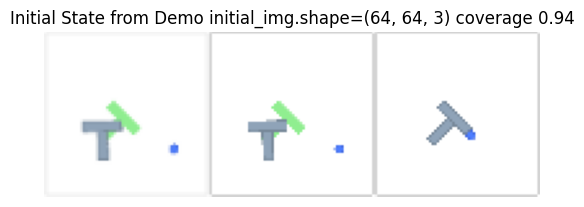

Episode replay complete. info['coverage']=0.9396415265006206 vs pixel coverage 1.00
diff position +36.84


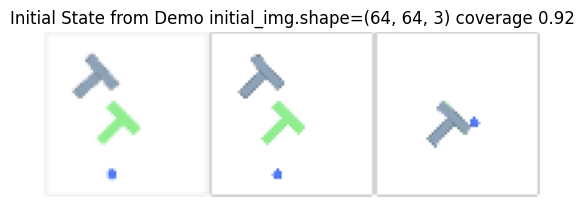

Episode replay complete. info['coverage']=0.9234226804251775 vs pixel coverage 0.98
diff position +43.31


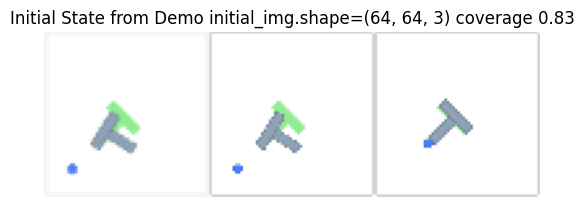

Episode replay complete. info['coverage']=0.8263067937508735 vs pixel coverage 0.91
diff position +39.43


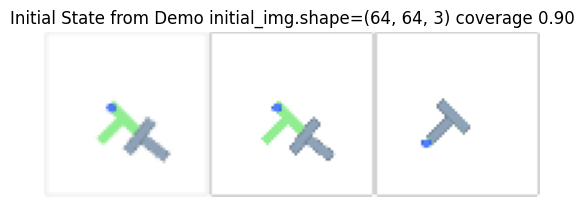

Episode replay complete. info['coverage']=0.8972760689563661 vs pixel coverage 0.99
diff position +42.54


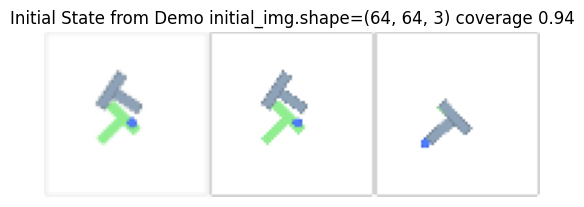

Episode replay complete. info['coverage']=0.9405802015201453 vs pixel coverage 0.98
diff position +86.37


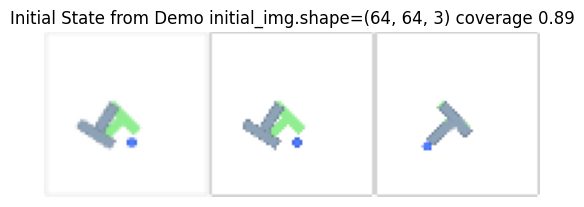

Episode replay complete. info['coverage']=0.8909091160228454 vs pixel coverage 0.94
diff position +86.90


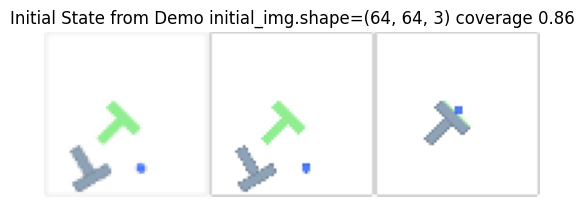

Episode replay complete. info['coverage']=0.8611048996562675 vs pixel coverage 0.91
diff position +52.90


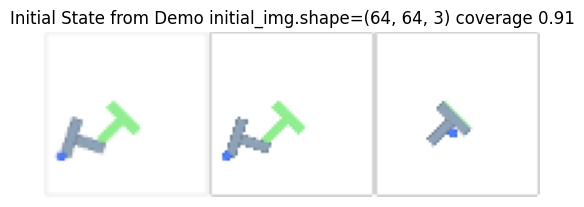

Episode replay complete. info['coverage']=0.9132134572137601 vs pixel coverage 0.90
diff position +34.02


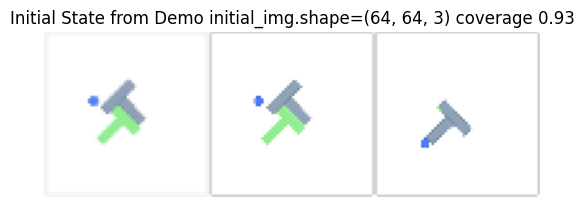

Episode replay complete. info['coverage']=0.9334923353885052 vs pixel coverage 0.98
diff position +86.18


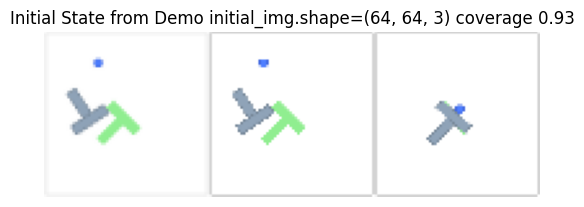

Episode replay complete. info['coverage']=0.9280765377116946 vs pixel coverage 0.96
diff position +15.59


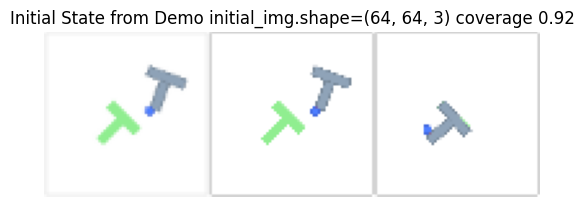

Episode replay complete. info['coverage']=0.9210564874380712 vs pixel coverage 0.96
diff position +6.86


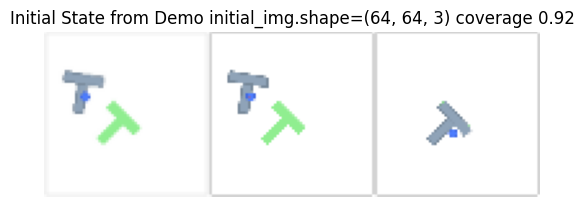

Episode replay complete. info['coverage']=0.921615942707711 vs pixel coverage 0.98
diff position +79.24


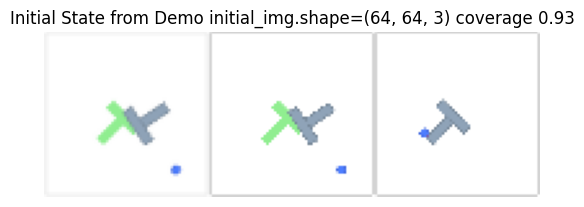

Episode replay complete. info['coverage']=0.9306081275377436 vs pixel coverage 1.00
diff position +72.35


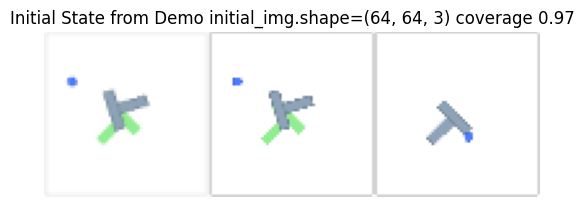

Episode replay complete. info['coverage']=0.9730012184638435 vs pixel coverage 1.00
diff position +17.83


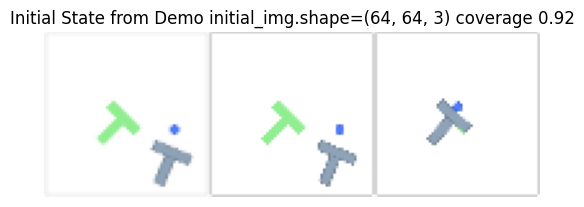

Episode replay complete. info['coverage']=0.9217640573916795 vs pixel coverage 0.97
diff position +83.40


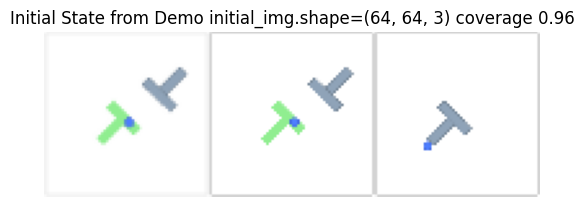

Episode replay complete. info['coverage']=0.957413769174692 vs pixel coverage 1.00
diff position +37.98


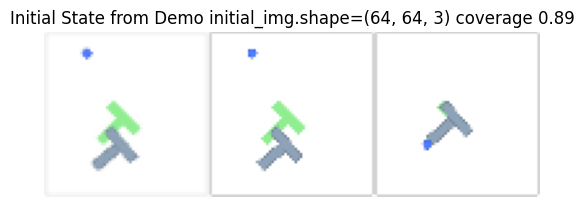

Episode replay complete. info['coverage']=0.8905855452939574 vs pixel coverage 0.94
diff position +85.44


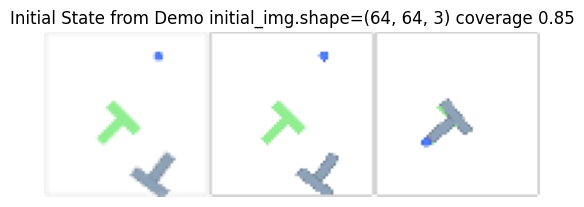

Episode replay complete. info['coverage']=0.8515985999104386 vs pixel coverage 0.92
diff position +89.96


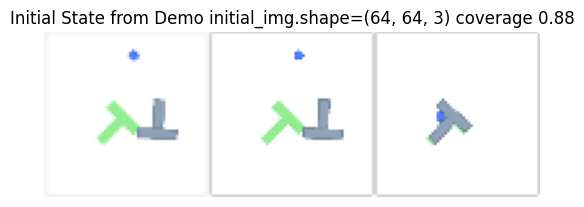

Episode replay complete. info['coverage']=0.8761906494892342 vs pixel coverage 0.93
diff position +44.94


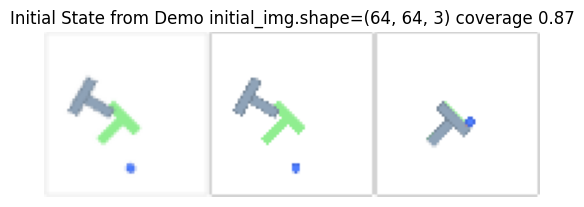

Episode replay complete. info['coverage']=0.8709023826784975 vs pixel coverage 0.92
diff position +84.41


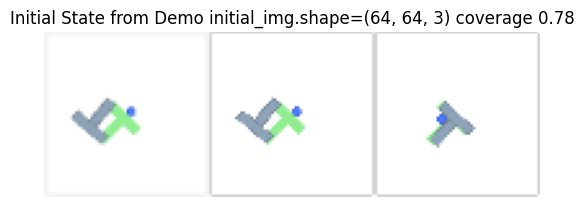

Episode replay complete. info['coverage']=0.7796515813776473 vs pixel coverage 0.85
diff position +49.46


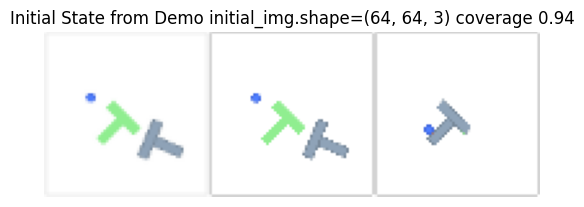

Episode replay complete. info['coverage']=0.9391382162423716 vs pixel coverage 0.99
diff position +11.10


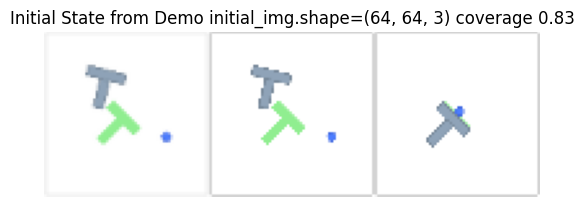

Episode replay complete. info['coverage']=0.8302110318613678 vs pixel coverage 0.92
diff position +88.87


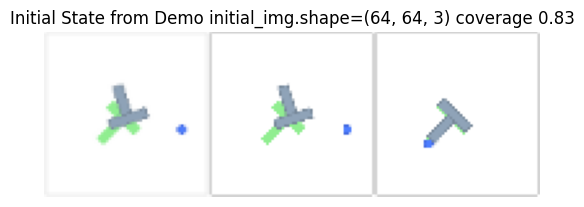

Episode replay complete. info['coverage']=0.8290970471409914 vs pixel coverage 0.91
diff position +88.32


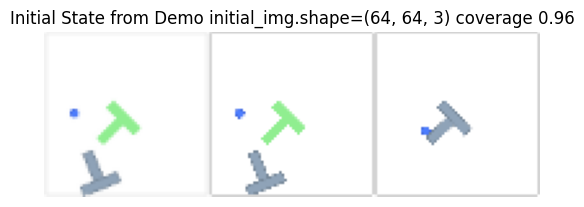

Episode replay complete. info['coverage']=0.9605389627637018 vs pixel coverage 1.00
diff position +88.92


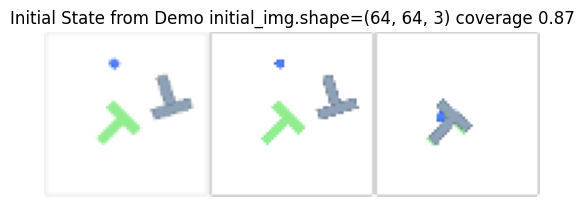

Episode replay complete. info['coverage']=0.8665403225489055 vs pixel coverage 0.92
diff position +79.11


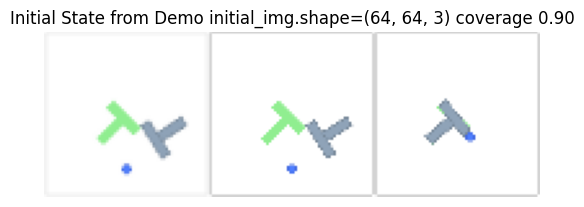

Episode replay complete. info['coverage']=0.8993488328106533 vs pixel coverage 0.94
diff position +86.06


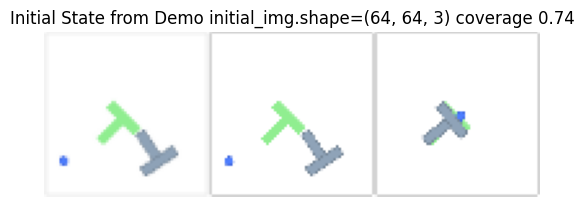

Episode replay complete. info['coverage']=0.7383637294991509 vs pixel coverage 0.83
diff position +67.24


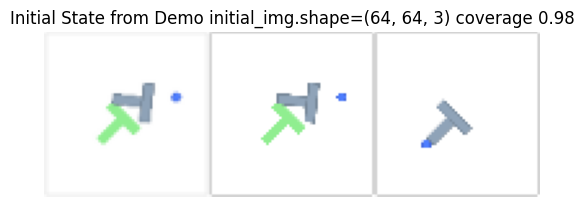

Episode replay complete. info['coverage']=0.9834243547139827 vs pixel coverage 1.00
diff position +72.41


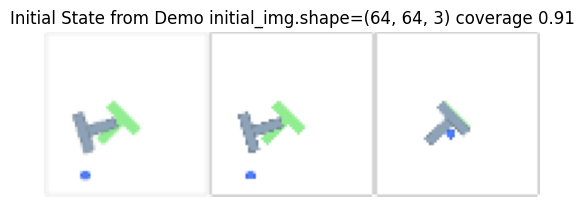

Episode replay complete. info['coverage']=0.9127015684327127 vs pixel coverage 0.90
diff position +85.93


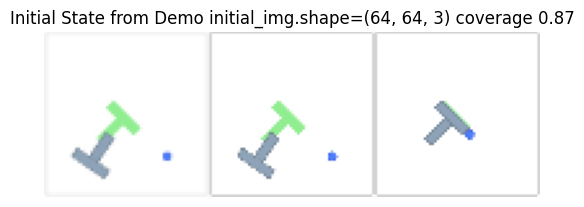

Episode replay complete. info['coverage']=0.8693651964407573 vs pixel coverage 0.90
diff position +24.93


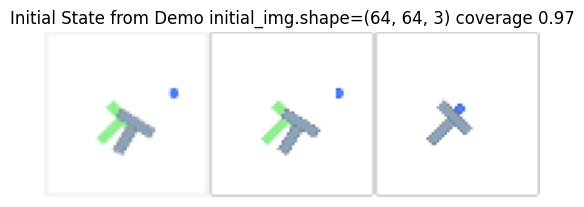

Episode replay complete. info['coverage']=0.9666241127889379 vs pixel coverage 1.00
diff position +88.43


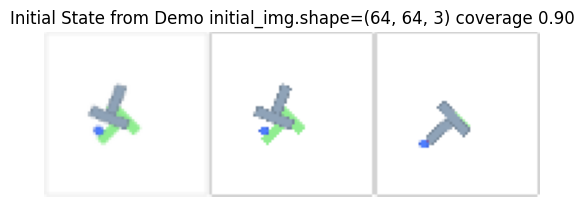

Episode replay complete. info['coverage']=0.9013736940629158 vs pixel coverage 0.94
diff position +63.55


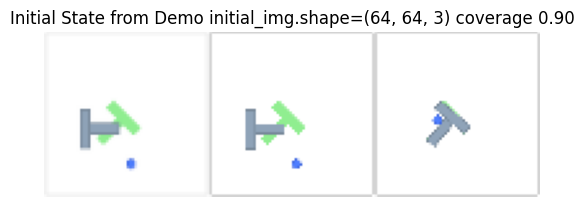

Episode replay complete. info['coverage']=0.8968202044526359 vs pixel coverage 0.93
diff position +12.88


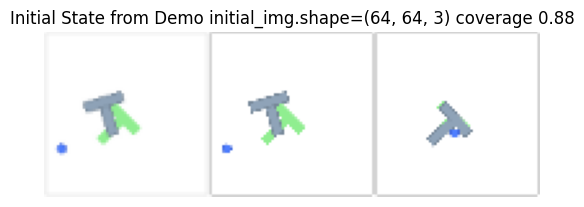

Episode replay complete. info['coverage']=0.8758443344027881 vs pixel coverage 0.92
diff position +90.00


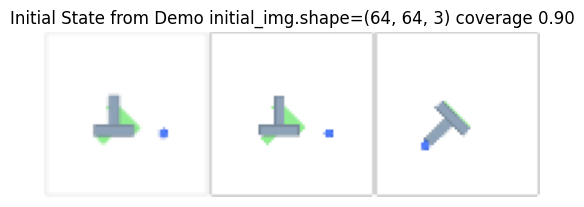

Episode replay complete. info['coverage']=0.9035863004090983 vs pixel coverage 0.90
diff position +21.44


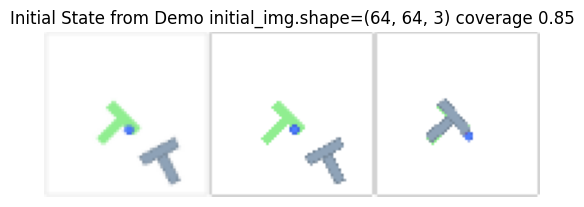

Episode replay complete. info['coverage']=0.8543393066571154 vs pixel coverage 0.90
diff position +61.56


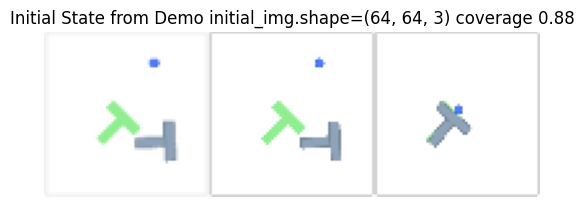

Episode replay complete. info['coverage']=0.8827091442108004 vs pixel coverage 0.92
diff position +25.60


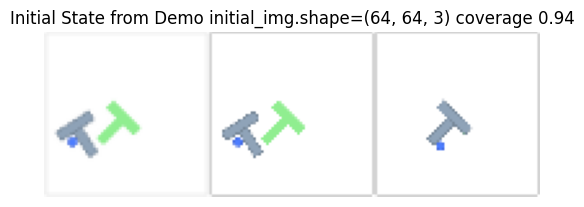

Episode replay complete. info['coverage']=0.9427797868866058 vs pixel coverage 1.00
diff position +19.82


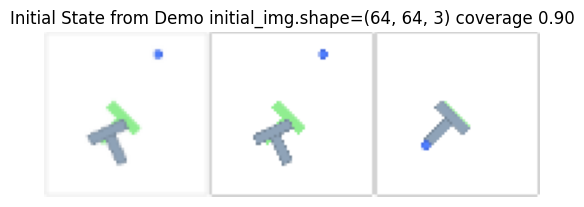

Episode replay complete. info['coverage']=0.9044844840453375 vs pixel coverage 0.90
diff position +11.49


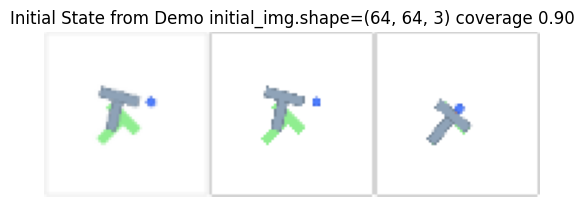

Episode replay complete. info['coverage']=0.8979846234157907 vs pixel coverage 0.95
diff position +88.11


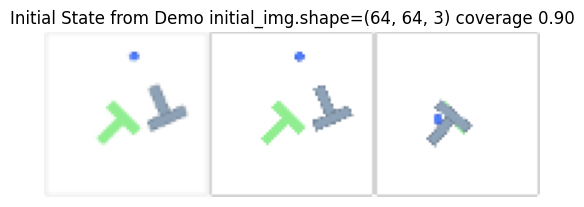

Episode replay complete. info['coverage']=0.8985485718794586 vs pixel coverage 0.95
diff position +86.93


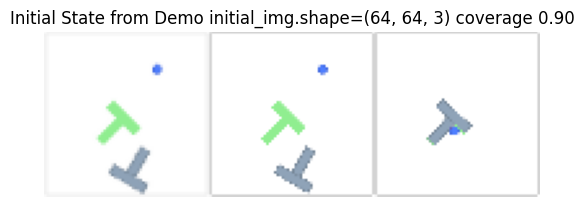

Episode replay complete. info['coverage']=0.903904943065917 vs pixel coverage 0.95
diff position +86.73


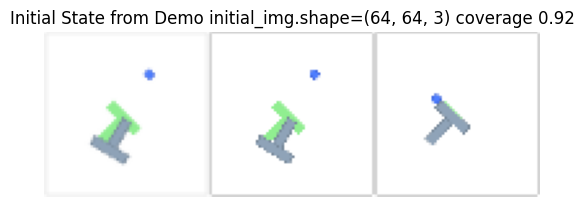

Episode replay complete. info['coverage']=0.9170837927928601 vs pixel coverage 0.93
diff position +61.64


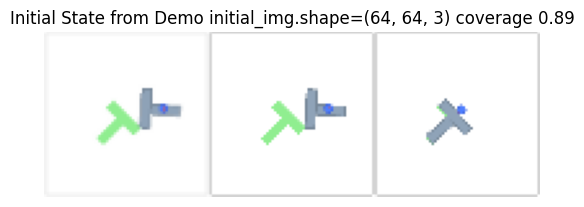

Episode replay complete. info['coverage']=0.8941775292077819 vs pixel coverage 0.95
diff position +89.72


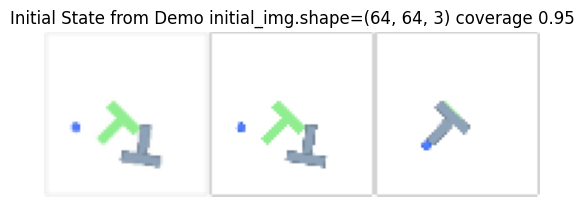

Episode replay complete. info['coverage']=0.9503199663930739 vs pixel coverage 0.93
diff position +80.39


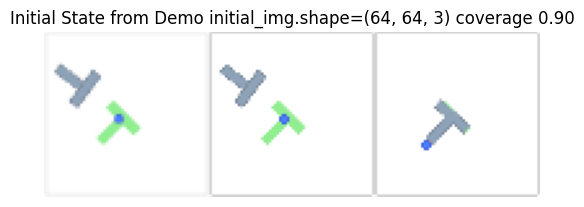

Episode replay complete. info['coverage']=0.8987632518739022 vs pixel coverage 0.94
diff position +61.45


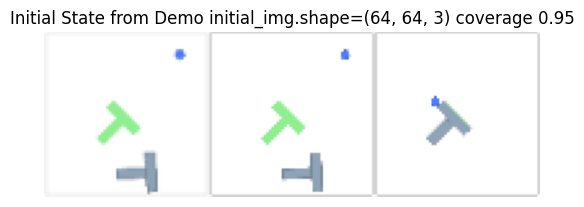

Episode replay complete. info['coverage']=0.9512500831649886 vs pixel coverage 0.90
diff position +88.47


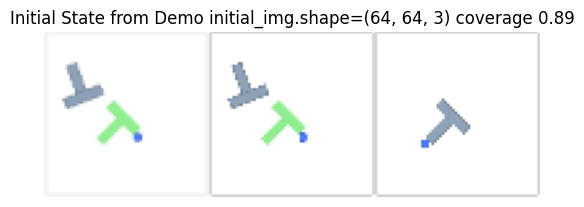

Episode replay complete. info['coverage']=0.8869951578875669 vs pixel coverage 1.00
diff position +67.65


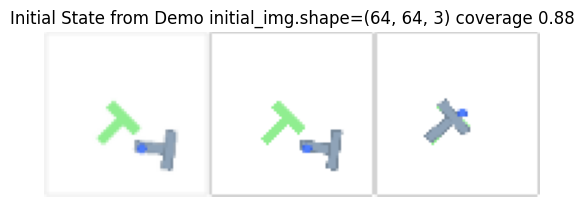

Episode replay complete. info['coverage']=0.8787770408350133 vs pixel coverage 0.93
diff position +33.00


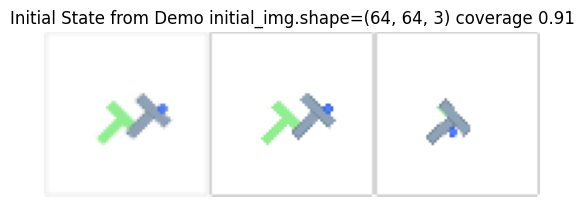

Episode replay complete. info['coverage']=0.9133255910171215 vs pixel coverage 0.96
diff position +51.19


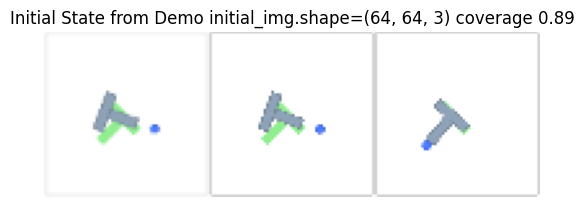

Episode replay complete. info['coverage']=0.886144141942012 vs pixel coverage 0.93
diff position +7.22


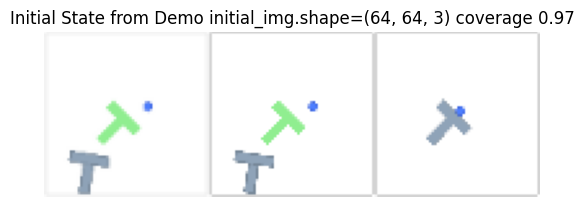

Episode replay complete. info['coverage']=0.9685510428017674 vs pixel coverage 1.00
diff position +37.35


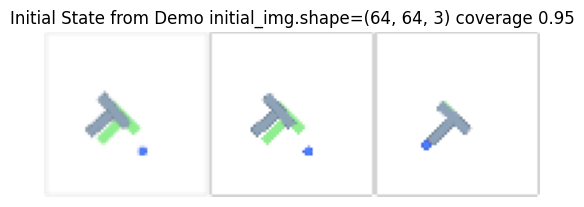

Episode replay complete. info['coverage']=0.9515521768956668 vs pixel coverage 0.96
diff position +35.34


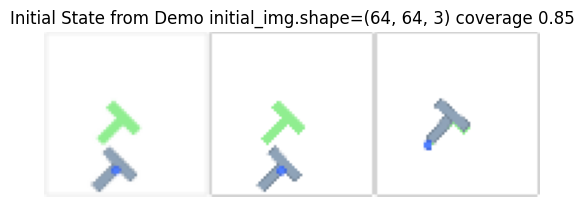

Episode replay complete. info['coverage']=0.849039614029366 vs pixel coverage 0.91
diff position +89.86


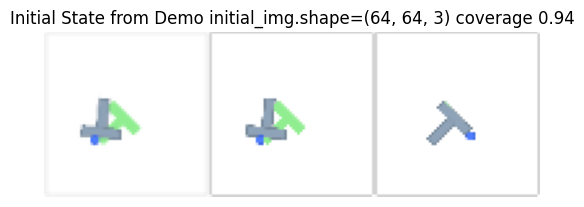

Episode replay complete. info['coverage']=0.9411954310570473 vs pixel coverage 0.98
diff position +87.02


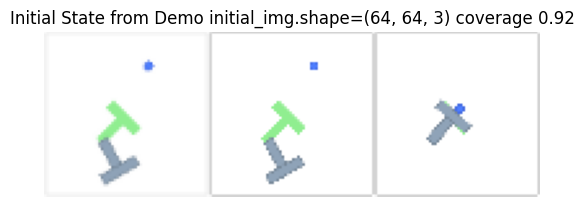

Episode replay complete. info['coverage']=0.9158999264101246 vs pixel coverage 0.95
diff position +89.99


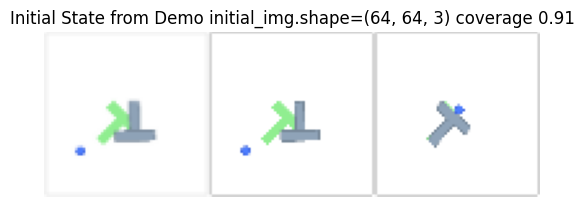

Episode replay complete. info['coverage']=0.9137904198781046 vs pixel coverage 0.95
diff position +53.20


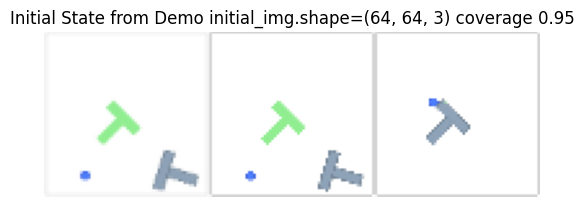

Episode replay complete. info['coverage']=0.9477280661414319 vs pixel coverage 0.99
diff position +38.23


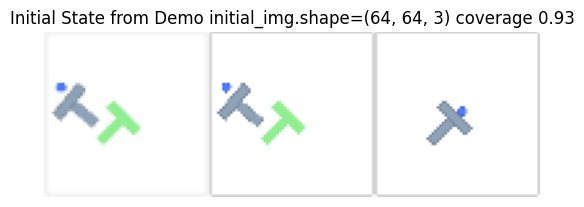

Episode replay complete. info['coverage']=0.9310511080035534 vs pixel coverage 1.00
diff position +80.27


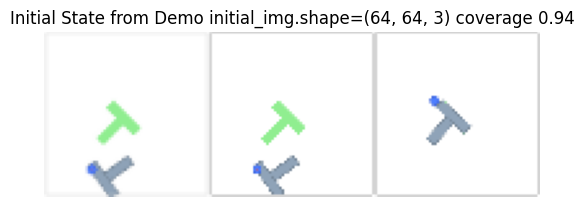

Episode replay complete. info['coverage']=0.9364401853853903 vs pixel coverage 0.99
diff position +20.97


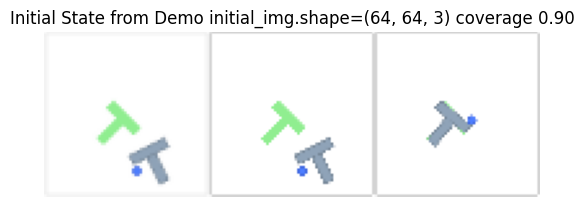

Episode replay complete. info['coverage']=0.8981278551682269 vs pixel coverage 0.93
diff position +88.27


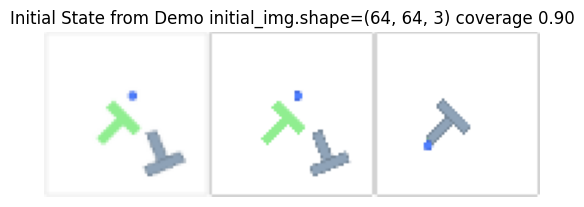

Episode replay complete. info['coverage']=0.9008674942628727 vs pixel coverage 1.00
diff position +37.09


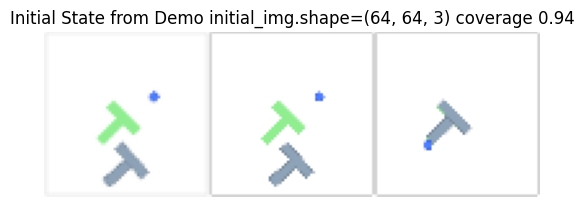

Episode replay complete. info['coverage']=0.9366436616004805 vs pixel coverage 0.96
diff position +0.88


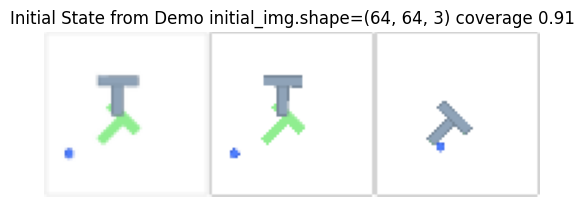

Episode replay complete. info['coverage']=0.9115659374932507 vs pixel coverage 1.00
diff position +57.25


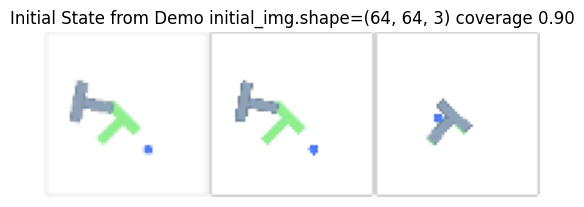

Episode replay complete. info['coverage']=0.8956201265267335 vs pixel coverage 0.93
diff position +85.44


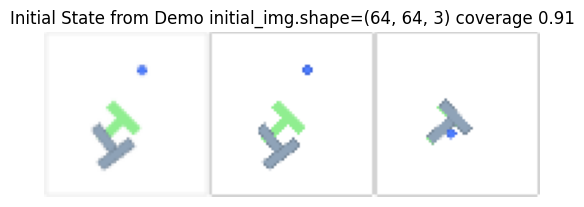

Episode replay complete. info['coverage']=0.9141048283249518 vs pixel coverage 0.94
diff position +54.42


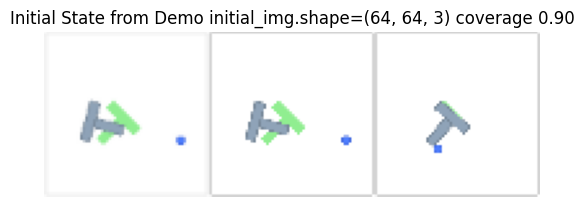

Episode replay complete. info['coverage']=0.8952209344545129 vs pixel coverage 0.92
diff position +5.37


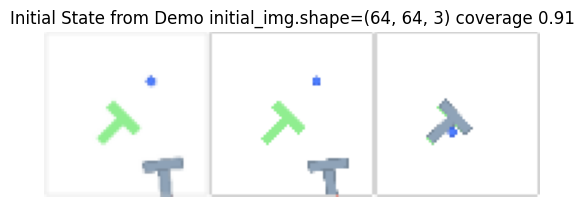

Episode replay complete. info['coverage']=0.9081907754630512 vs pixel coverage 0.92
diff position +19.18


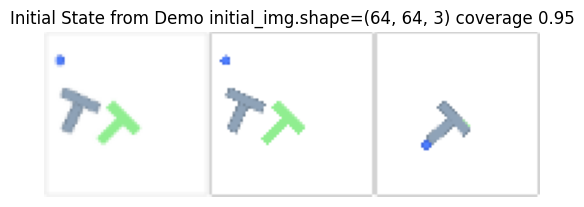

Episode replay complete. info['coverage']=0.9488942131844859 vs pixel coverage 0.97
diff position +22.82


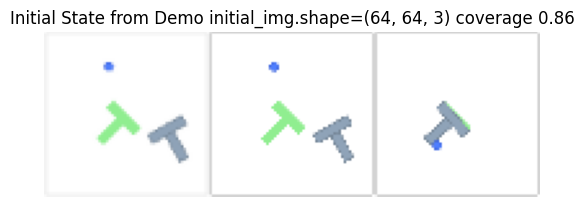

Episode replay complete. info['coverage']=0.8560009796861753 vs pixel coverage 0.88
diff position +20.66


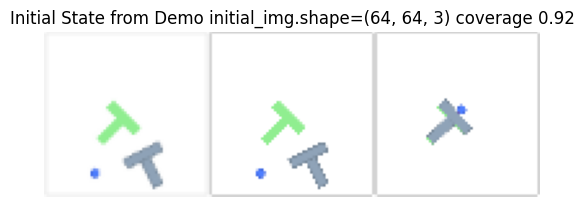

Episode replay complete. info['coverage']=0.9183391436139969 vs pixel coverage 0.92
diff position +64.05


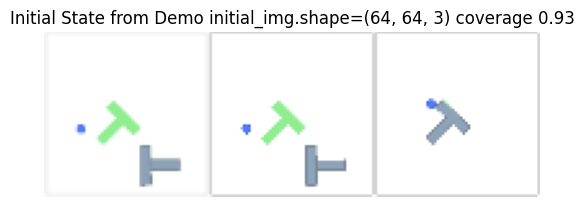

Episode replay complete. info['coverage']=0.9308035634137162 vs pixel coverage 0.97
diff position +83.73


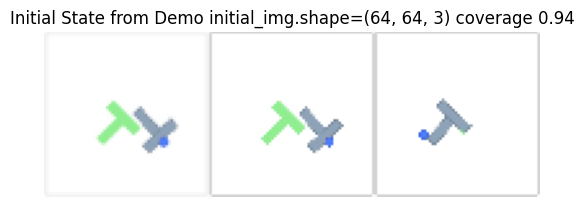

Episode replay complete. info['coverage']=0.9442935065202067 vs pixel coverage 0.98


In [58]:
import collections

def load_pusht_demos(zarr_path):
    """
    Loads actions and states from Zarr and splits them into episodes
    based on 'meta/episode_ends'.
    """
    root = zarr.open(zarr_path, mode='r')
    
    # Load raw flattened arrays
    all_actions = root['data/action'][:]
    all_states = root['data/state'][:]
    episode_ends = root['meta/episode_ends'][:]
    
    episodes = []
    start_idx = 0
    
    for end_idx in episode_ends:
        # Slice the data for this specific episode
        episode_data = {
            'action': all_actions[start_idx:end_idx],
            'state': all_states[start_idx:end_idx],
            # We don't strictly need images for replay (we can render live), 
            # but you can load them here if needed:
            'img': root['data/img'][start_idx:end_idx],
            'keypoint': root['data/keypoint'][start_idx:end_idx]
        }
        episodes.append(episode_data)
        start_idx = end_idx
        
    print(f"Loaded {len(episodes)} episodes.")
    return episodes

import time
def replay_demo(env, episode_data, fps=60, differential_action=False):
    """
    Resets the environment to the demo's initial state and replays actions.
    """
    
    # 2. Force the environment state to match the demo's first frame.
    #    The state usually contains [agent_x, agent_y, block_x, block_y, block_theta].
    #    Without this, the block will be in a random spot and the actions won't make sense.
    initial_state = episode_data['state'][0]

    # 1. Reset environment for the wrappers and then for the initial state
    env.reset()
    obs, info = env.unwrapped.reset(options={"reset_to_state": initial_state})
    for _ in range(100): # takes time to arrive at the target state
        env.unwrapped._set_state(initial_state)
    env_img = env.render()
    # print(f"{initial_state=}")
    # show the initial image in episode_data
    initial_img = episode_data['img'][0].astype(np.uint8)
    final_img = episode_data['img'][-1].astype(np.uint8)

    print(f'diff position {np.linalg.norm(obs - initial_state):+1.2f}')

    # 3. Execute actions
    actions = episode_data['action']
    
    if differential_action:
        # The difference between the consecutive agent positions is our differential action
        states = episode_data['state']; state_idx = 1;nsteps=0
        target_state = states[state_idx]; target_state_threshold = 1.0
        def close_enough(a, b, thresh):
            return np.linalg.norm(a - b) < thresh
        while True:
            action = target_state[0:2] - env.unwrapped.agent.position
            obs, reward, terminated, truncated, info = env.step(action); nsteps+=1
            env.render()

            if close_enough(env.unwrapped.agent.position, target_state[0:2], target_state_threshold):
                state_idx += 1
                if state_idx < len(states):
                    target_state = states[state_idx]
                else:
                    break
        
        print(f"Total steps taken: {nsteps}, demo length: {len(states)}")
        # repeat the last action
        env.step(action)
    else:
        for action in actions:
            # Step the environment
            obs, reward, terminated, truncated, info = env.step(action)
            final_env_img = env.render()
            
            # Render is handled automatically by render_mode='human' in env creation
            # If you need to slow it down to be viewable:
            # plt.pause(1/fps) 
            # time.sleep(1/fps)

        # add one more action that's the same as the last action, since these demonstrations seem to end a step early
        obs, reward, terminated, truncated, info = env.step(actions[-1])
        # for _ in range(2):
        #     obs, reward, terminated, truncated, info = env.step(actions[-1])

    final_env_img = env.render()
    toshow = np.hstack([initial_img, env_img, final_env_img])
    plt.imshow(toshow)
    plt.axis('off')
    plt.title(f"Initial State from Demo {initial_img.shape=} coverage {info['coverage']:1.2f}")
    plt.show(block=False)
    pixel_coverage = env.unwrapped._get_pixel_coverage()
    print(f"Episode replay complete. {info['coverage']=} vs pixel coverage {pixel_coverage:1.2f}")

    return info['coverage'], pixel_coverage

# --- Usage ---
import copy, collections

differential_action = False

# 1. Load the episodes
demos = load_pusht_demos(ZARR_PATH)

env = make_env(differential_action=differential_action)
# resize the images if the env observation size is different from the demo image size
if env.unwrapped.observation_width != demos[0]['img'].shape[1] or env.unwrapped.observation_height != demos[0]['img'].shape[2]:
    for ep in demos:
        img = ep['img']
        if img.shape[1] != 64 or img.shape[2] != 64:
            from skimage.transform import resize
            resized_imgs = []
            for im in img:
                im_resized = resize(im, (64, 64), preserve_range=True).astype(np.uint8)
                resized_imgs.append(im_resized)
            ep['img'] = np.array(resized_imgs)

coverages = collections.defaultdict(list)
pixel_coverages = collections.defaultdict(list)
# # 2. Replay the first 3 episodes
for y_offset in [0]: #range(40,50,1):
    env = make_env(differential_action=differential_action)
    coverage = []
    pixel_coverage = []
    for i in range(206):
    # for i in [1]:
        # print(f"Replaying Episode {i}...")
        offset = [0, 0] # find_offset(ZARR_PATH, ep_idx=i)
        cov, pix_cov = replay_demo(env, copy.deepcopy(demos[i]), fps=120, differential_action=differential_action)
        coverage.append(cov)
        pixel_coverage.append(pix_cov)
    coverages[y_offset] = coverage
    pixel_coverages[y_offset] = pixel_coverage

# # Close env when done
# time.sleep(1)
# env.close()

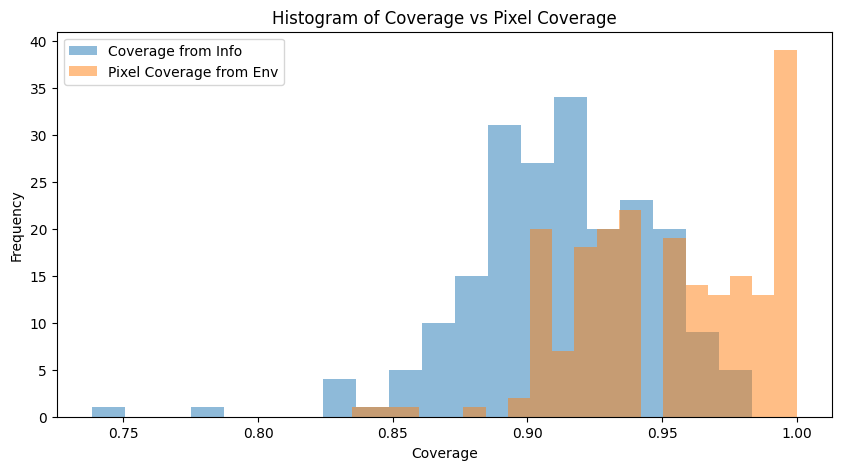

In [64]:
# histogram of coverage vs pixel coverage
c = coverages[0]
pc = pixel_coverages[0]
plt.figure(figsize=(10,5))
plt.hist(c, bins=20, alpha=0.5, label='Coverage from Info')
plt.hist(pc, bins=20, alpha=0.5, label='Pixel Coverage from Env')
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.title('Histogram of Coverage vs Pixel Coverage')
plt.legend()
plt.show()

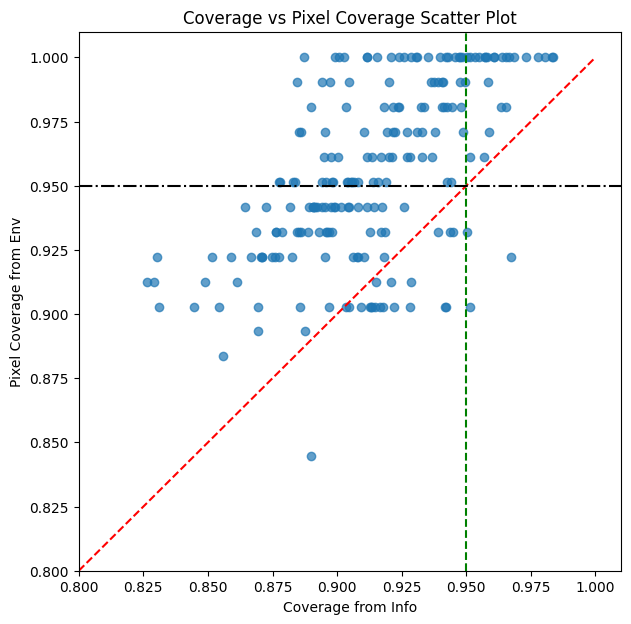

In [65]:
# plot each point coverage vs pixel coverage x,y scatter
plt.figure(figsize=(7,7))
plt.scatter(c, pc, alpha=0.7)
plt.xlabel('Coverage from Info')
plt.ylabel('Pixel Coverage from Env')
plt.title('Coverage vs Pixel Coverage Scatter Plot')

# set the x and y limits to [0,1]
plt.xlim(0.8, 1.01)
plt.ylim(0.8, 1.01)

# plot a y=x line
plt.plot([0.8, 1], [0.8, 1], color='red', linestyle='--')

# vertical line at the environment success threshold
plt.axvline(x=env.unwrapped.success_threshold, color='green', linestyle='--', label='Success Threshold')

# horizontal line at the environment success threshold
plt.axhline(y=env.unwrapped.success_threshold, color='black', linestyle='-.', label='Success Threshold')

plt.show()

In [66]:
# percentage above the success threshold
success_count = sum(1 for cov in c if cov >= env.unwrapped.success_threshold)
total_count = len(c)
success_percentage = (success_count / total_count) * 100
print(f"Success Percentage: {success_percentage:1.2f}% ({success_count}/{total_count})")

# percentage above the success threshold for pixel coverage
success_count_pc = sum(1 for cov in pc if cov >= env.unwrapped.success_threshold)
total_count_pc = len(pc)
success_percentage_pc = (success_count_pc / total_count_pc) * 100
print(f"Pixel Coverage Success Percentage: {success_percentage_pc:1.2f}% ({success_count_pc}/{total_count_pc})")

Success Percentage: 13.11% (27/206)
Pixel Coverage Success Percentage: 54.85% (113/206)


In [62]:
np.mean(coverages[0])

np.float64(0.9119580310096342)

### For the original action space
Mean with 0 extra steps: 0.89939

Mean with 1 extra steps: 0.91195

Mean with 2 extra steps: 0.90637

so these demonstrations are likely terminated a step too early. 

### For the differential action space
Mean with 1 extra steps: 0.84154

In [63]:
env = make_env()
# reset to 0s state
env.unwrapped.reset(options={"reset_to_state": np.zeros(5)})    

Pusht force sparse reward:  False  display_cross:  False
Successfully created environment: gym_pusht/PushT-v0


(array([0., 0., 0., 0., 0.]),
 {'pos_agent': array([0., 0.]),
  'vel_agent': array([0., 0.]),
  'block_pose': array([0., 0., 0.]),
  'goal_pose': array([256.        , 256.        ,   0.78539816]),
  'n_contacts': 1,
  'is_success': False,
  'coverage': 0.0})